In [2]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
rc("font", family="Malgun Gothic")
# matplotlib inline
get_ipython().run_line_magic("matplotlib", "inline")

Missing colon in file WindowsPath('C:/Users/user/anaconda3/envs/ds_study/Lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 221 ('_manager_api.html for more information')
Missing colon in file 'C:\\Users\\user\\anaconda3\\envs\\ds_study\\Lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc', line 221 ('_manager_api.html for more information')


In [3]:
# xlsx 파일 읽기
file_path = '../data/imdb_final_6.xlsx'
df = pd.read_excel(file_path)

In [4]:
df.tail()

,Unnamed: 0,korean_title,english_title,year,total_season_num,runtime,genre,age_rating,production_country,total_count,...,season_13,season_14,season_15,season_16,season_17,director,writer,actor,imdb_title,imdb_url
901,901,레일라,Leila,2019,1,46,"드라마, 전쟁, SF",15,인도,9300,...,NaN,NaN,NaN,NaN,NaN,"['Deepa Mehta', 'Pawan Kumar', 'Shanker Raman']","['Asad Hussain', 'Deepa Mehta', 'Patrick Graha...","['Huma Qureshi', 'Rahul Khanna', 'Siddharth', ...",Leila (TV Series 2019),https://www.imdb.com/title/tt9337588/
902,902,100만 엔의 여인들,Million Yen Women,2017,1,30,"스릴러, 범죄, 드라마, 로맨스",19,일본,2100,...,NaN,NaN,NaN,NaN,NaN,"['Hiroto Hara', 'Hirotoshi Hara', 'Kenji Kuwaj...","['Shunjû Aono', 'Yoshimiko Murooka', 'Yoshitak...","['Yôjirô Noda', 'Rila Fukushima', 'Rena Matsui...",1000000 yen no Onnatachi (TV Mini Series 2017),https://www.imdb.com/title/tt6686450/
903,903,킬러 코미디언,Hasmukh,2020,1,33,"범죄, 드라마, 스릴러, 코미디",19,인도,2800,...,NaN,NaN,NaN,NaN,NaN,['Nikhil Gonsalves'],"['Amogh Ranadive', 'Neeraj Pandey', 'Nikhil Go...","['Vir Das', 'Ranvir Shorey', 'Amrita Bagchi', ...",Hasmukh (TV Mini Series 2020),https://www.imdb.com/title/tt9359294/
904,904,달러,Dollar,2019,1,41,"액션, 드라마, 로맨스",15,레바논,651,...,NaN,NaN,NaN,NaN,NaN,['Samer Al Barkawi'],['Hisham Hilal'],"['Mark Lewis', 'Adel Karam', 'Amel Bouchoucha'...",Dollar (TV Series 2019),https://www.imdb.com/title/tt10687564/
905,905,"엘리트들, 못다 한 이야기: 나디아 구스만",Elite Short Stories: Nadia Guzmán,2021,1,11,"드라마, 로맨스",15,스페인,2100,...,NaN,NaN,NaN,NaN,NaN,['Dani de la Orden'],['Carlos Montero'],"['Miguel Bernardeau', 'Mina El Hammani', 'Omar...",Elite Short Stories: Nadia Guzmán (TV Mini Ser...,https://www.imdb.com/title/tt14671790/


In [5]:
df.columns

Index(['Unnamed: 0', 'korean_title', 'english_title', 'year',
       'total_season_num', 'runtime', 'genre', 'age_rating',
       'production_country', 'total_count', 'total_rate', 'watchlist',
       'popularity', 'user_review', 'critic_review', 'production',
       'distributor', 'season_1', 'season_2', 'season_3', 'season_4',
       'season_5', 'season_6', 'season_7', 'season_8', 'season_9', 'season_10',
       'season_11', 'season_12', 'season_13', 'season_14', 'season_15',
       'season_16', 'season_17', 'director', 'writer', 'actor', 'imdb_title',
       'imdb_url'],
      dtype='object')

In [6]:
len(df.columns)

39

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          906 non-null    int64  
 1   korean_title        906 non-null    object 
 2   english_title       906 non-null    object 
 3   year                906 non-null    int64  
 4   total_season_num    906 non-null    int64  
 5   runtime             906 non-null    int64  
 6   genre               906 non-null    object 
 7   age_rating          906 non-null    object 
 8   production_country  906 non-null    object 
 9   total_count         906 non-null    int64  
 10  total_rate          906 non-null    float64
 11  watchlist           906 non-null    int64  
 12  popularity          906 non-null    int64  
 13  user_review         906 non-null    int64  
 14  critic_review       906 non-null    int64  
 15  production          822 non-null    object 
 16  distribu

In [8]:
df.describe()

,Unnamed: 0,year,total_season_num,runtime,total_count,total_rate,watchlist,popularity,user_review,critic_review
count,906.00000,906.000000,906.000000,906.000000,9.060000e+02,906.000000,9.060000e+02,906.000000,906.000000,906.000000
mean,452.50000,2019.458057,1.681015,47.424945,3.779154e+04,7.136755,4.057726e+04,1123.760486,281.775938,21.143488
std,261.68397,4.030396,1.490602,13.780016,1.239551e+05,0.917748,1.056858e+05,1464.552847,533.489826,33.644212
min,0.00000,1966.000000,1.000000,10.000000,1.410000e+02,3.200000,0.000000e+00,0.000000,1.000000,0.000000
25%,226.25000,2018.000000,1.000000,41.000000,2.100000e+03,6.600000,2.400000e+03,0.000000,28.000000,4.000000
50%,452.50000,2020.000000,1.000000,47.000000,6.100000e+03,7.300000,6.950000e+03,185.000000,85.500000,11.000000
75%,678.75000,2022.000000,2.000000,55.750000,2.275000e+04,7.800000,2.900000e+04,2169.750000,279.250000,24.000000
max,905.00000,2023.000000,17.000000,95.000000,2.200000e+06,9.500000,1.168000e+06,4951.000000,5700.000000,425.000000


In [4]:
len(df["korean_title"].unique())

902

In [5]:
#중복값 확인
df[df.duplicated(subset=['korean_title'], keep=False)]

,Unnamed: 0,korean_title,english_title,year,total_season_num,runtime,genre,age_rating,production_country,total_count,...,season_15,season_16,season_17,director,writer,actor,imdb_title,imdb_url,wins,nominations
94,94,하트브레이크 하이,Heartbreak High,2022,1,51,"드라마, 로맨스",19,호주,13000,...,NaN,NaN,NaN,"['Adam Murfet', 'Gracie Otto', 'Jessie Oldfiel...","['Ben Gannon', 'Hannah Carroll Chapman', 'Jean...","['Ayesha Madon', 'James Majoos', 'Chloe Hayden...",Heartbreak High (TV Series 2022–2025),https://www.imdb.com/title/tt15054962/,9,18
143,143,하트브레이크 하이,Heartbreak High,1994,6,44,"드라마, 로맨스",15,호주,3600,...,NaN,NaN,NaN,"['Andrew Dillon', 'Andrew Prowse', 'Catherine ...","['Alan Love', 'Alexa Wyatt', 'Carol Williams',...","['Callan Mulvey', 'Lara Cox', 'Emma Roche', 'A...",Heartbreak High (TV Series 1994–1999),https://www.imdb.com/title/tt0108800/,0,2
216,216,더 클럽,The Club,2021,2,47,"드라마, 코미디",19,터키,12000,...,NaN,NaN,NaN,"['Seren Yüce', 'Zeynep Gunay Tan']","['Aysin Akbulut', 'Bengü Üçüncü', 'Merih Aslan...","['Gökçe Bahadir', 'Baris Arduç', 'Asude Kalebe...",The Club (TV Series 2021–2023),https://www.imdb.com/title/tt13317582/,2,5
517,517,아름다웠던 우리에게,A Love So Beautiful,2017,1,41,"코미디, 드라마, 로맨스",12,중국,1800,...,NaN,NaN,NaN,['Long Yang'],"['Chucen Zhou', 'Wu Tong', 'Xueying Wu', 'Yanb...","['Yitian Hu', 'Shen Yue', 'Yaodong Zhao', 'Wan...",A Love So Beautiful (TV Series 2017),https://www.imdb.com/title/tt8434720/,5,1
744,744,더 클럽,The Club,2019,1,34,"드라마, 코미디",19,멕시코,981,...,NaN,NaN,NaN,"['Camila Ibarra', 'José Agustín Ortíz Ramírez'...","['Camila Ibarra', 'María Remírez Valenzuela', ...","['Alejandro Speitzer', 'Minnie West', 'Jorge C...",The Club (TV Series 2019),https://www.imdb.com/title/tt10833132/,0,0
870,870,아름다웠던 우리에게,A Love So Beautiful,2020,1,23,"드라마, 코미디",12,대한민국,1700,...,NaN,NaN,NaN,['Min Jung Seo'],"['Choi Yoo-Jung', 'Jang Yoo-Yeon']","['So Joo-yeon', 'Kim Yo-han', 'Hoi-Hyeon Yeo',...",A Love So Beautiful (TV Series 2020–2021),https://www.imdb.com/title/tt13642264/,0,0


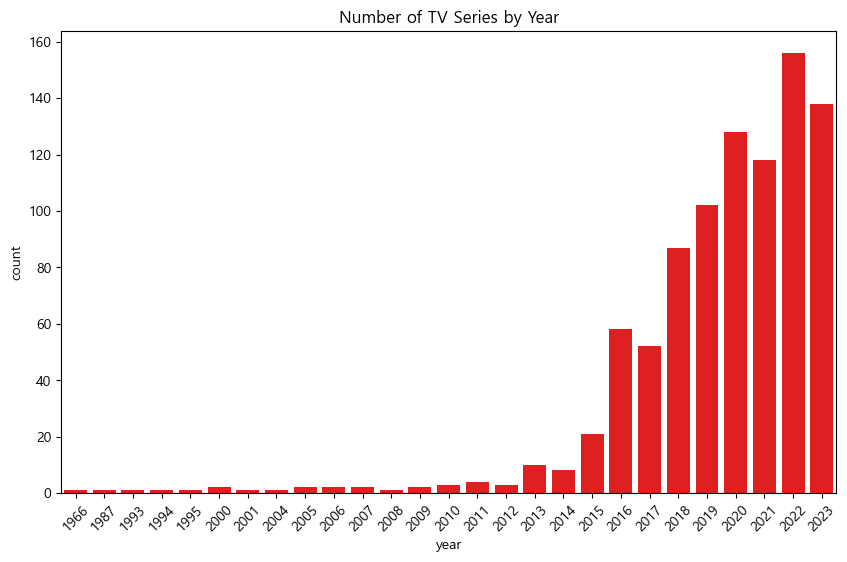

In [12]:
# 연도별 TV 시리즈 수
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='year', color='red')
plt.title('Number of TV Series by Year')
plt.xticks(rotation=45)
plt.show()

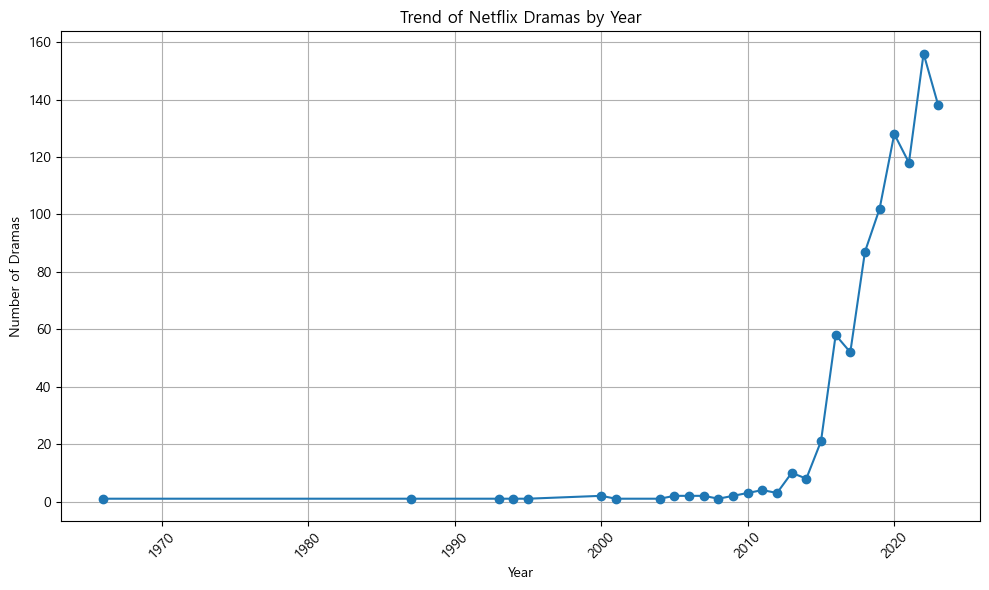

In [13]:
# 연도별 넷플릭스 드라마 수 계산
dramas_per_year = df['year'].value_counts().sort_index()

# 연도별 드라마 수를 선그래프로 시각화
plt.figure(figsize=(10, 6))
plt.plot(dramas_per_year.index, dramas_per_year.values, marker='o', linestyle='-')
plt.title('Trend of Netflix Dramas by Year')
plt.xlabel('Year')
plt.ylabel('Number of Dramas')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
df['production_country'].value_counts()

production_country
미국                  213
대한민국                174
영국                   53
스페인                  48
일본                   41
                   ... 
호주, 미국                1
오스트리아                 1
프랑스, 독일, 스페인, 영국      1
아일랜드, 영국              1
레바논                   1
Name: count, Length: 76, dtype: int64

In [15]:
df['production_country'].value_counts().sum()

906

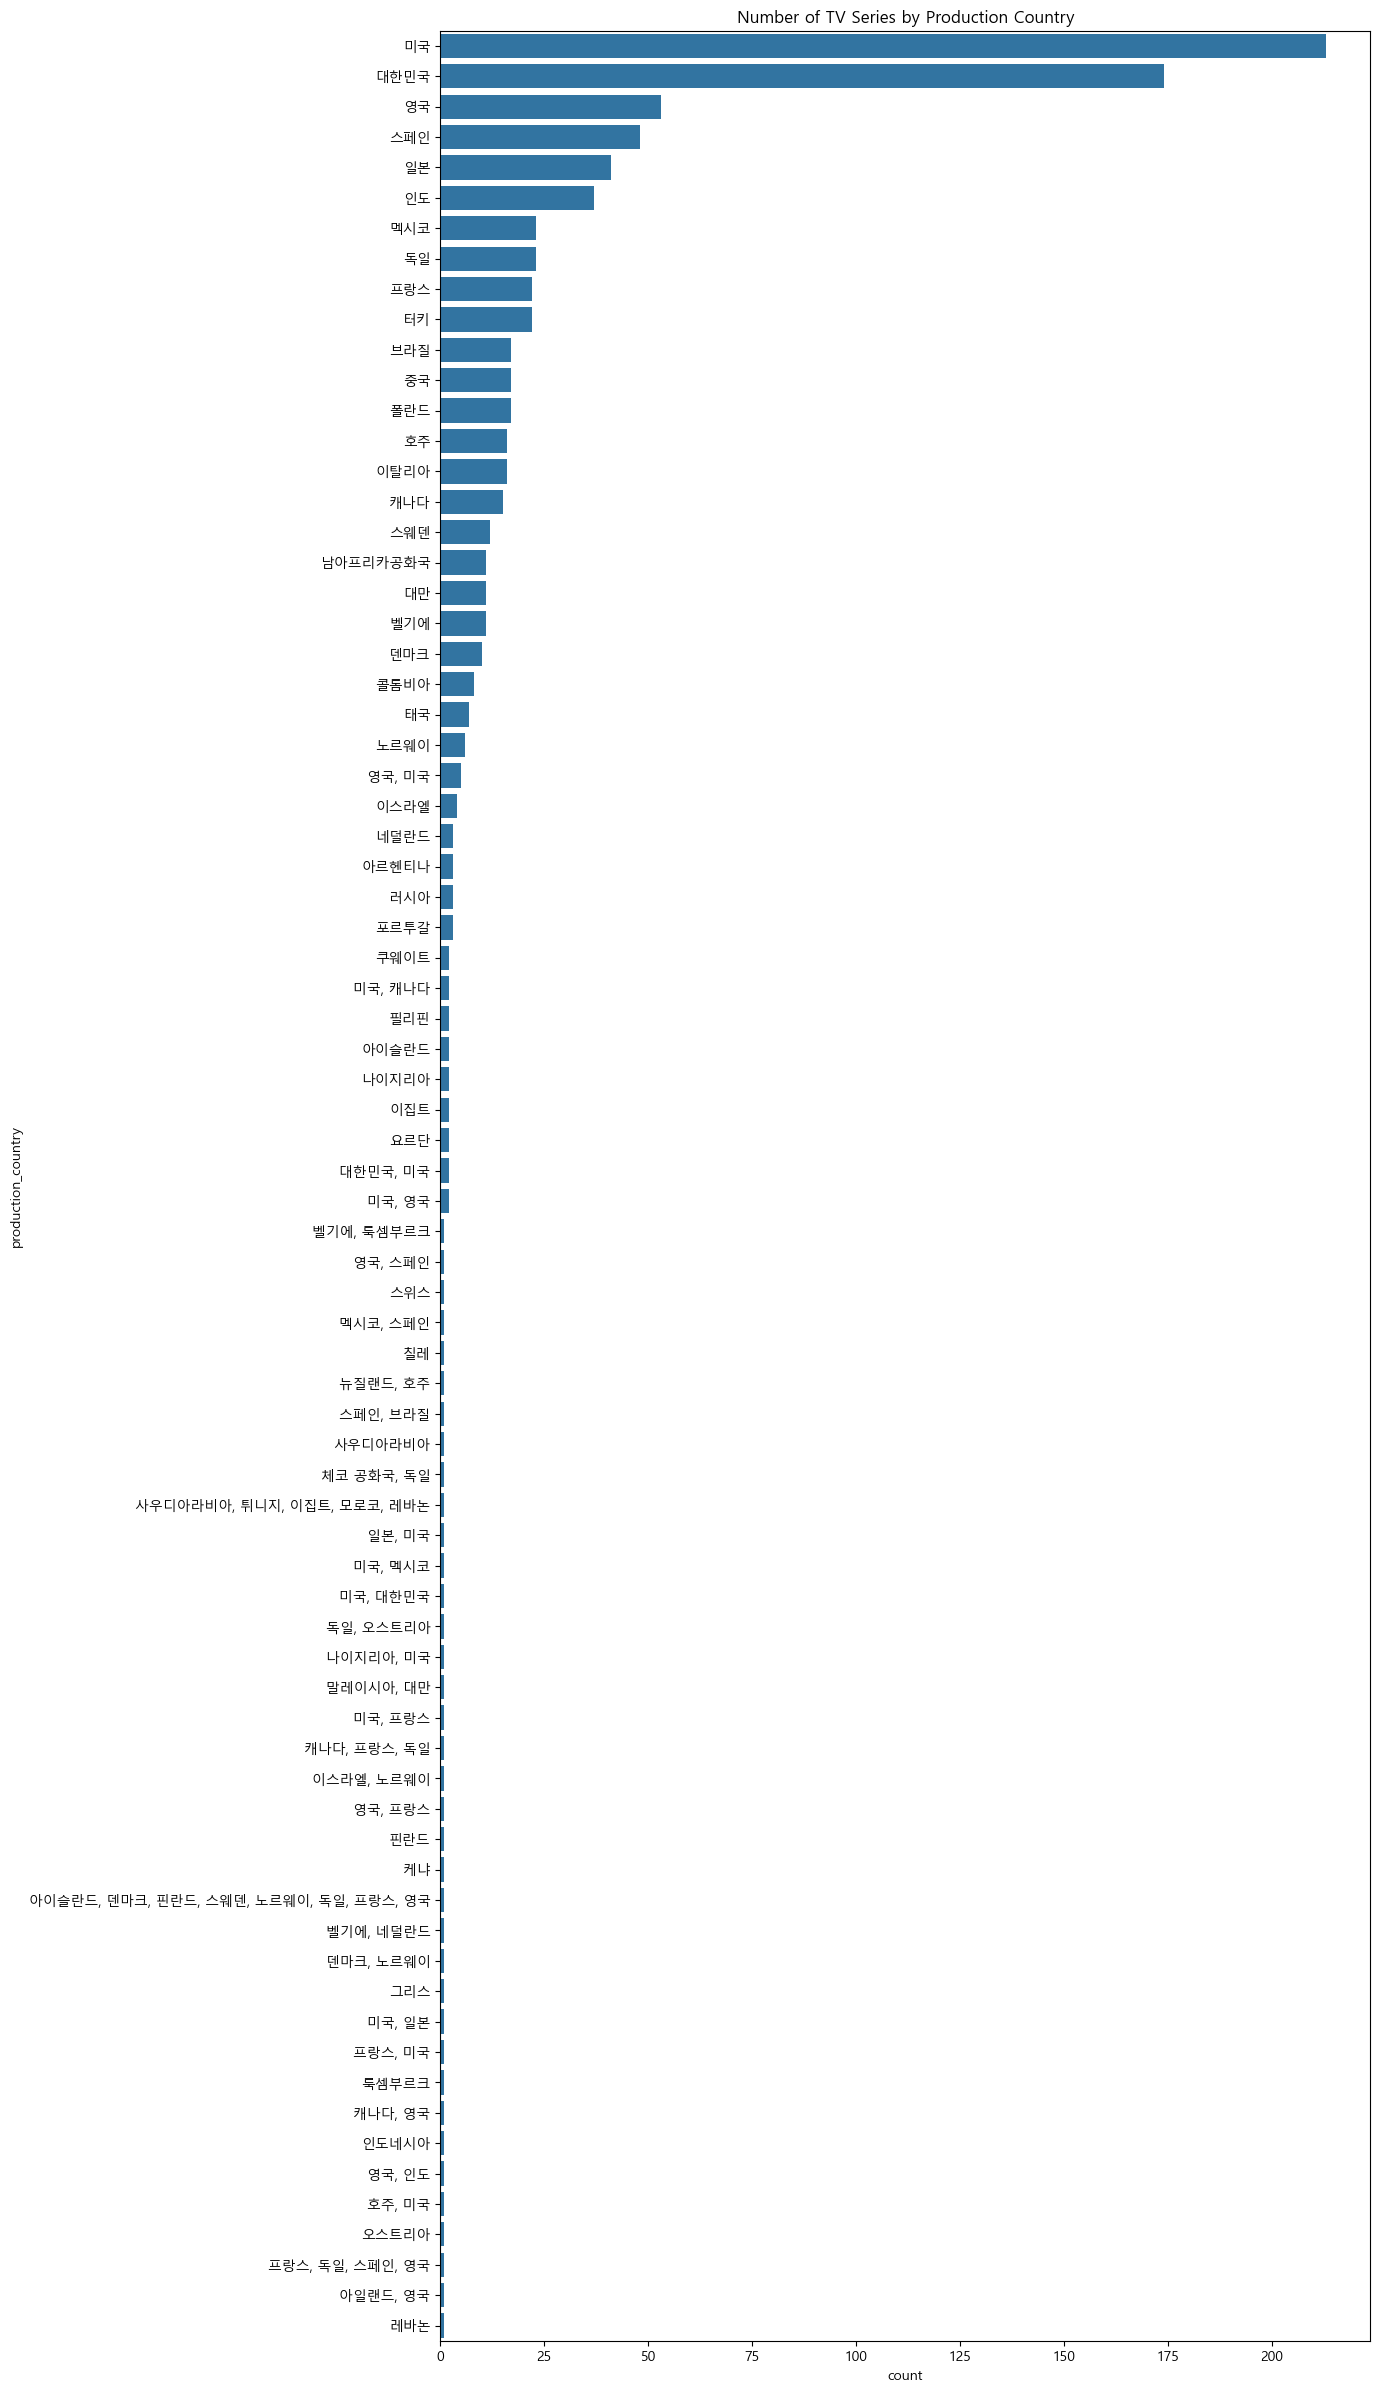

In [16]:
# 국가별 TV 시리즈 수
plt.figure(figsize=(12, 30))
sns.countplot(y=df['production_country'], order=df['production_country'].value_counts().index)
plt.title('Number of TV Series by Production Country')
plt.show()

In [17]:
# 제조국가가 하나 이상인 값
df[df['production_country'].apply(lambda x: isinstance(x, str) and len(x.split(',')) > 1)]

,Unnamed: 0,korean_title,english_title,year,total_season_num,runtime,genre,age_rating,production_country,total_count,...,season_13,season_14,season_15,season_16,season_17,director,writer,actor,imdb_title,imdb_url
65,65,샌드맨,The Sandman,2022,1,48,"판타지, 공포, SF, 드라마",19,"미국, 영국",174000,...,NaN,NaN,NaN,NaN,NaN,"['Andrés Baiz', 'Coralie Fargeat', 'Hisko Huls...","['Alexander Newman-Wise', 'Allan Heinberg', 'A...","['Tom Sturridge', 'Boyd Holbrook', 'Patton Osw...",The Sandman (TV Series 2022,https://www.imdb.com/title/tt1751634/
72,72,트랩트,Trapped,2015,2,50,"범죄, 드라마, 스릴러",19,"아이슬란드, 덴마크, 핀란드, 스웨덴, 노르웨이, 독일, 프랑스, 영국",25000,...,NaN,NaN,NaN,NaN,NaN,"['Baldvin Zophoníasson', 'Baltasar Kormákur', ...","['Baltasar Kormákur', 'Clive Bradley', 'Davíð ...","['Ólafur Darri Ólafsson', 'Ilmur Kristjánsdótt...",Trapped (TV Series 2015),https://www.imdb.com/title/tt3561180/
75,75,뤼팽,Lupin,2021,3,46,"드라마, 액션, 범죄",15,"미국, 프랑스",140000,...,NaN,NaN,NaN,NaN,NaN,"['Daniel Grou', 'Hugo Gélin', 'Louis Leterrier...","['Adam Usden', 'Anne Cissé', 'Eliane Montane',...","['Omar Sy', 'Ludivine Sagnier', 'Soufiane Guer...",Lupin (TV Series 2021),https://www.imdb.com/title/tt2531336/
124,124,챔피언의 비트,Champion,2023,1,45,드라마,19,"미국, 영국",673,...,NaN,NaN,NaN,NaN,NaN,"['Adeyemi Michael', 'Caleb Femi', 'Christiana ...","['Ameir Brown', 'Candice Carty-Williams', 'Ede...","['Déja J. Bowens', 'Nadine Marshall', 'Ray Fea...",Champion (TV Series 2023),https://www.imdb.com/title/tt21364468/
152,152,클릭베이트,Clickbait,2021,1,46,"범죄, 드라마, 스릴러",19,"호주, 미국",61000,...,NaN,NaN,NaN,NaN,NaN,"['Ben Young', 'Brad Anderson', 'Cherie Nowlan'...","['Bradford Winters', 'Christian White', 'Melis...","['Zoe Kazan', 'Betty Gabriel', 'Phoenix Raei',...",Clickbait (TV Mini Series 2021),https://www.imdb.com/title/tt10888878/
166,166,어느 날 월터 형제들과 살게 됐다,My Life with the Walter Boys,2023,1,45,"드라마, 로맨스",15,"영국, 미국",13000,...,NaN,NaN,NaN,NaN,NaN,"['Jason Priestley', 'Jerry Ciccoritti', 'Nimis...","['Ali Laventhol', 'Ali Novak', 'Grace Condon',...","['Nikki Rodriguez', 'Noah LaLonde', 'Ashby Gen...",My Life with the Walter Boys (TV Series 2023),https://www.imdb.com/title/tt8323628/
183,183,"당신과 나, 그리고 그녀",You Me Her,2016,5,27,"코미디, 드라마, 로맨스",19,"미국, 캐나다",11000,...,NaN,NaN,NaN,NaN,NaN,"['Gail Harvey', 'Jem Garrard', 'Nisha Ganatra'...","['Alex Koplow', 'Elaine Aronson', 'Jacqueline ...","['Greg Poehler', 'Rachel Blanchard', 'Priscill...",You Me Her (TV Series 2016–2020),https://www.imdb.com/title/tt5179408/
209,209,후 이즈 에린?,Who Is Erin Carter?,2023,1,49,"액션, 범죄, 스릴러, 드라마",15,"영국, 미국",21000,...,NaN,NaN,NaN,NaN,NaN,"['Ashley Way', 'Bill Eagles', 'Savina Dellicour']","['Adam Gyngell', 'Fred Armesto', 'Jack Lothian']","['Evin Ahmad', 'Sean Teale', 'Denise Gough', '...",Who Is Erin Carter? (TV Mini Series 2023),https://www.imdb.com/title/tt18075020/
222,222,아나토미 오브 스캔들,Anatomy of a Scandal,2022,1,45,"드라마, 스릴러",19,"영국, 미국",36000,...,NaN,NaN,NaN,NaN,NaN,['S.J. Clarkson'],"['David E. Kelley', 'Melissa James Gibson', 'S...","['Sienna Miller', 'Michelle Dockery', 'Rupert ...",Anatomy of a Scandal (TV Mini Series 2022),https://www.imdb.com/title/tt12748084/
241,241,밤의 여인들,Women of the Night,2019,1,47,"드라마, 범죄",19,"벨기에, 네덜란드",1100,...,NaN,NaN,NaN,NaN,NaN,"['Ben Sombogaart', 'Dries Vos']","['Bram Renders', 'Ian Ginn', 'Karin van der Me...","['Karina Smulders', 'Susan Radder', 'Matteo va...",Women of the Night (TV Series 2019–2020),https://www.imdb.com/title/tt7785420/


In [18]:
country = df['production_country'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)

In [19]:
country.value_counts()

미국       221
대한민국     176
영국        61
스페인       49
일본        42
        ... 
 인도        1
오스트리아      1
아일랜드       1
 대한민국      1
레바논        1
Name: count, Length: 73, dtype: int64

In [20]:
country.value_counts().sum()

956

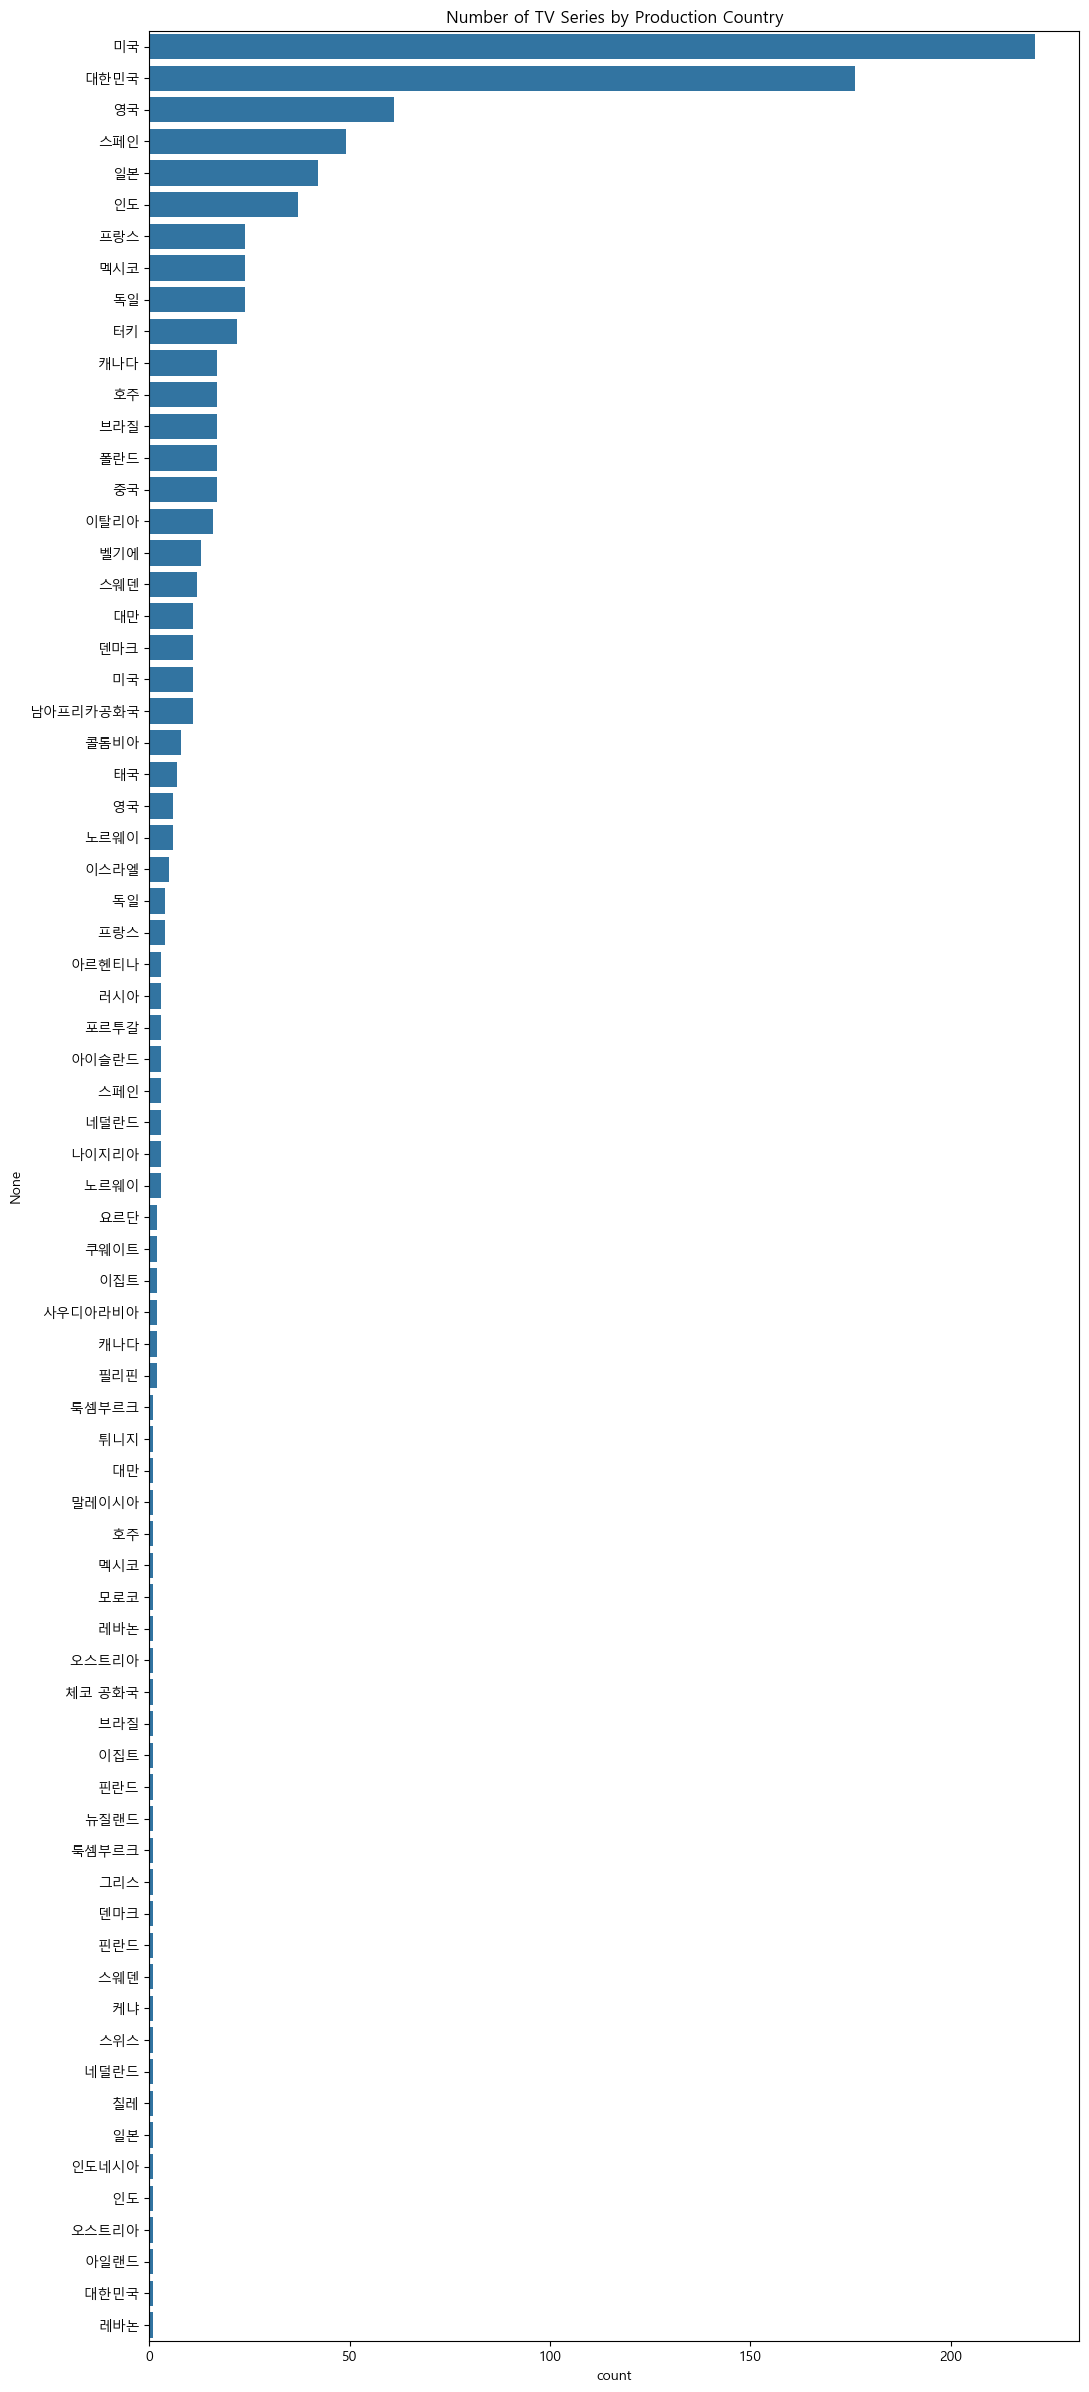

In [21]:
# 국가별 TV 시리즈 수
plt.figure(figsize=(12, 30))
sns.countplot(y=country, order=country.value_counts().index)
plt.title('Number of TV Series by Production Country')
plt.show()

In [22]:
df['production_country']

0      대한민국
1       벨기에
2        대만
3        미국
4      대한민국
       ... 
901      인도
902      일본
903      인도
904     레바논
905     스페인
Name: production_country, Length: 906, dtype: object

In [23]:
country

0      대한민국
1       벨기에
2        대만
3        미국
4      대한민국
       ... 
901      인도
902      일본
903      인도
904     레바논
905     스페인
Length: 956, dtype: object

In [24]:
# production_country 열을 문자열로 변환
df['production_country'] = df['production_country'].astype(str)

# 한국에서 제작된 드라마 필터링
korean_dramas = df[df['production_country'].str.contains('대한민국', na=False)]

# 연도별 드라마 수 계산
dramas_per_year = korean_dramas['year'].value_counts().sort_index()

# 결과 출력
dramas_per_year

year
2010     2
2011     1
2013     3
2014     1
2015     1
2016     8
2017     7
2018    13
2019    20
2020    31
2021    29
2022    32
2023    29
Name: count, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_20368\114985453.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dramas_per_year.index, y=dramas_per_year.values, palette='viridis')


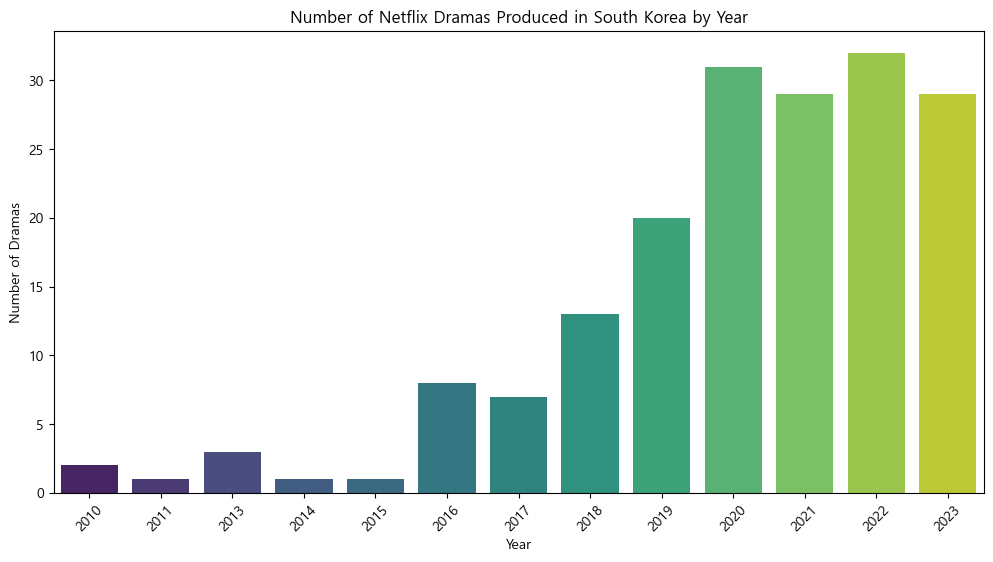

In [25]:
# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=dramas_per_year.index, y=dramas_per_year.values, palette='viridis')
plt.title('Number of Netflix Dramas Produced in South Korea by Year')
plt.xlabel('Year')
plt.ylabel('Number of Dramas')
plt.xticks(rotation=45)
plt.show()

In [137]:
# 장르별 빈도 계산
genre_counts = df['genre'].value_counts().head(5)
genre_counts

genre
드라마             78
코미디, 드라마        54
드라마, 로맨스        47
범죄, 드라마, 스릴러    44
드라마, 코미디        34
Name: count, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_20368\1120366097.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=genres, order=genres.value_counts().index, palette='Reds_d')


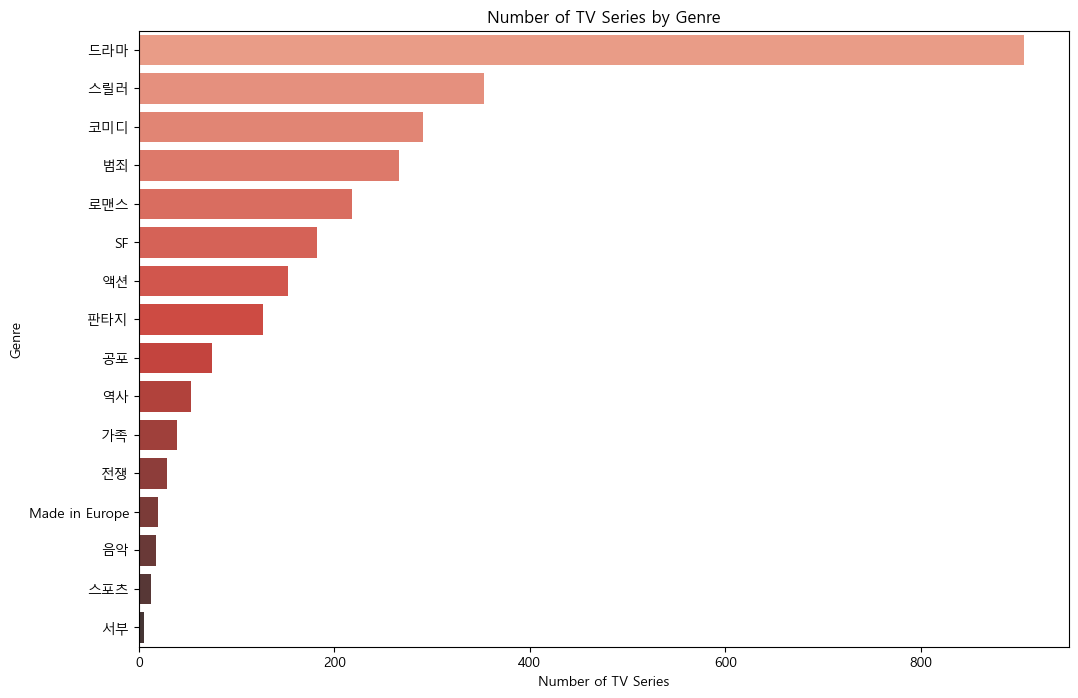

In [26]:
# 장르별 TV 시리즈 수 계산 (split한 후)
plt.figure(figsize=(12, 8))
genres = df['genre'].str.split(',', expand=True).stack().str.strip().reset_index(level=1, drop=True)
sns.countplot(y=genres, order=genres.value_counts().index, palette='Reds_d')
plt.title('Number of TV Series by Genre')
plt.xlabel('Number of TV Series')
plt.ylabel('Genre')
plt.show()


In [27]:
genres.value_counts()

드라마               906
스릴러               353
코미디               291
범죄                266
로맨스               218
SF                182
액션                153
판타지               127
공포                 75
역사                 53
가족                 39
전쟁                 29
Made in Europe     20
음악                 18
스포츠                12
서부                  5
Name: count, dtype: int64

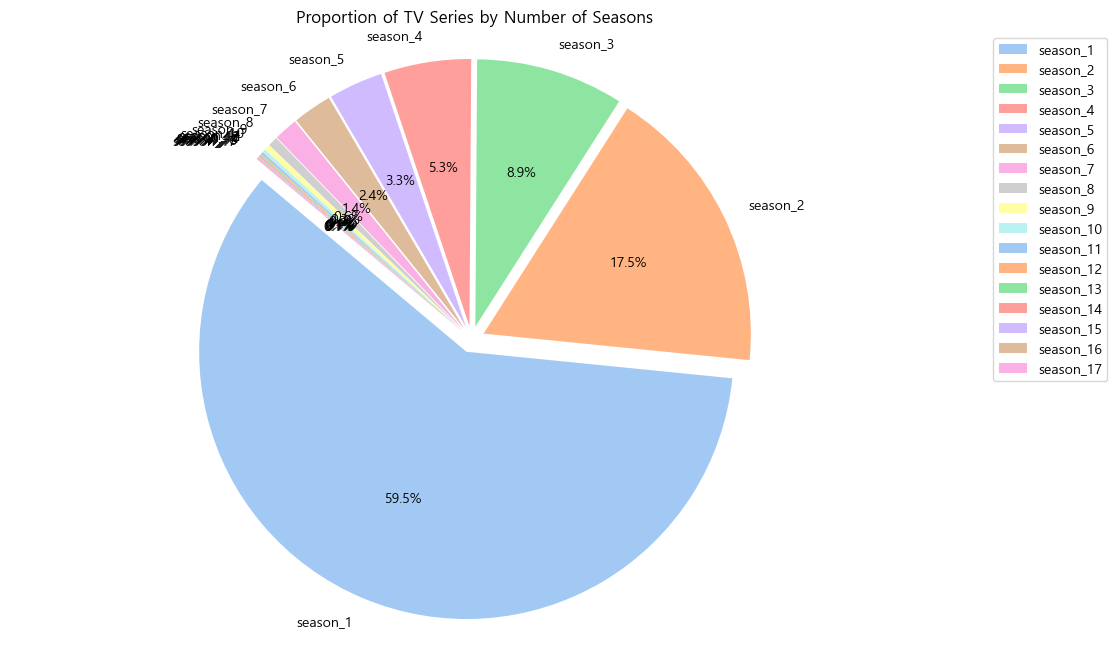

In [28]:
# 시즌별 개수 계산
season_counts = df[['season_1', 'season_2', 'season_3', 'season_4', 'season_5', 'season_6', 'season_7', 'season_8', 'season_9', 'season_10', 'season_11', 'season_12', 'season_13', 'season_14', 'season_15', 'season_16', 'season_17']].notnull().sum()

# explode 파라미터 설정 (섹션을 약간 떨어뜨림)
explode = [0.05] * len(season_counts)

# 파이 차트 그리기
plt.figure(figsize=(12, 8))
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'), explode=explode)
plt.title('Proportion of TV Series by Number of Seasons')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# 범례 추가
plt.legend(season_counts.index, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [29]:
# 관람등급 별 작품 수 계산
age_counts = df['age_rating'].value_counts()
age_counts

age_rating
19     484
15     355
12      56
ALL     10
7        1
Name: count, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_20368\2767203224.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_counts.index, y=age_counts.values, palette='viridis')


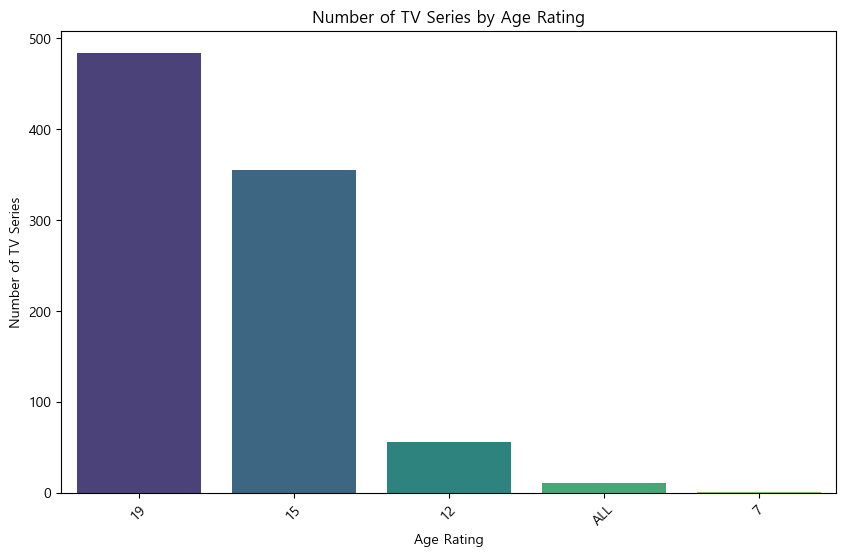

In [30]:
# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
sns.barplot(x=age_counts.index, y=age_counts.values, palette='viridis')
plt.title('Number of TV Series by Age Rating')
plt.xlabel('Age Rating')
plt.ylabel('Number of TV Series')
plt.xticks(rotation=45)
plt.show()

---

# 다시 시도

In [58]:
df['actor'].isna().sum()

0

In [138]:
# actor 컬럼이 리스트 형태인지 확인
print(df['actor'].apply(lambda x: isinstance(x, list)).value_counts())

actor
False    909
Name: count, dtype: int64


In [139]:
df['actor']

0      ['Lee Jung-jae', 'Park Hae-soo', 'Yasushi Iwak...
1      ['Luc De Ruelle', 'Maaike Neuville', 'Tom Verm...
2      ['Wei-Ning Hsu', 'Hsiao-chuan Chang', 'Shih-Si...
3      ['Nonso Anozie', 'Christian Convery', 'Stefani...
4      ['Song Kang', 'Lee Jin-wook', 'Lee Si-young', ...
                             ...                        
904    ['Huma Qureshi', 'Rahul Khanna', 'Siddharth', ...
905    ['Yôjirô Noda', 'Rila Fukushima', 'Rena Matsui...
906    ['Vir Das', 'Ranvir Shorey', 'Amrita Bagchi', ...
907    ['Mark Lewis', 'Adel Karam', 'Amel Bouchoucha'...
908    ['Miguel Bernardeau', 'Mina El Hammani', 'Omar...
Name: actor, Length: 909, dtype: object

In [141]:
df['actor'].head()

0    ['Lee Jung-jae', 'Park Hae-soo', 'Yasushi Iwak...
1    ['Luc De Ruelle', 'Maaike Neuville', 'Tom Verm...
2    ['Wei-Ning Hsu', 'Hsiao-chuan Chang', 'Shih-Si...
3    ['Nonso Anozie', 'Christian Convery', 'Stefani...
4    ['Song Kang', 'Lee Jin-wook', 'Lee Si-young', ...
Name: actor, dtype: object

In [142]:
# 'actor' 컬럼의 문자열 데이터를 리스트 형태로 변환
df['actor'] = df['actor'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# 각 배우의 이름을 하나씩 꺼내오는 함수
def extract_actors(actor_list):
    extracted_actors = []
    for actors in actor_list:
        if isinstance(actors, list):
            extracted_actors.extend(actors)
    return extracted_actors

# 'actor' 컬럼에서 각 배우의 이름을 하나씩 꺼내옴
all_actors = extract_actors(df['actor'])

# 결과 출력
print(all_actors[:100])  # 앞의 100명 배우만 출력

['Lee Jung-jae', 'Park Hae-soo', 'Yasushi Iwaki', 'Hoyeon', 'Oh Yeong-su', 'Wi Ha-joon', 'Heo Sung-tae', 'Anupam Tripathi', 'Greg Chun', 'Stephen Fu', 'Luc De Ruelle', 'Maaike Neuville', 'Tom Vermeir', 'Peter Gorissen', 'Zouzou Ben Chikha', 'Piet De Praitere', 'Maaike Cafmeyer', 'Josse De Pauw', 'Sofie Decleir', 'Mieke De Groote', 'Wei-Ning Hsu', 'Hsiao-chuan Chang', 'Shih-Sian Wang', 'Tsai-Hsing Chang', 'Nien-Hsien Ma', 'Hao-Zhe Lai', 'Moon Lee', 'Honduras', 'Diane Lin', 'Wei-min Chen', 'Nonso Anozie', 'Christian Convery', 'Stefania LaVie Owen', 'Adeel Akhtar', 'James Brolin', 'Naledi Murray', 'Aliza Vellani', 'Dania Ramirez', 'Amie Donald', 'Amy Seimetz', 'Song Kang', 'Lee Jin-wook', 'Lee Si-young', 'Park Gyuyoung', 'Kim Guk-Hee', 'Woo Jung-Kook', 'Kim Hee-Jung', 'Go Min-si', 'Yool Heo', 'Lee Joon-Woo', 'Keri Russell', 'Rufus Sewell', 'David Gyasi', 'Ali Ahn', 'Rory Kinnear', 'Ato Essandoh', 'Jess Chanliau', 'Pearl Mackie', 'Tim Delap', 'Kenichiro Thomson', 'Freddie Highmore', 'Richa

In [143]:
# 'production_country' 컬럼의 각 나라를 개별 항목으로 나누기
df['production_country'] = df['production_country'].str.split(', ')

# 'production_country' 컬럼을 분리하여 새로운 DataFrame 생성
df_exploded = df.explode('production_country')

# 나라별로 그룹화
grouped = df_exploded.groupby('production_country')['actor']

# 각 나라별로 가장 많이 출연한 배우를 찾기
most_common_actors = {}

for country, actors in grouped:
    # 배우 리스트를 평탄화하고 카운트
    all_actors = [actor for sublist in actors if isinstance(sublist, list) for actor in sublist]
    if all_actors:
        common_actor = Counter(all_actors).most_common(1)[0][0]
        most_common_actors[country] = common_actor
    else:
        most_common_actors[country] = None

# 결과를 DataFrame으로 변환
result_df = pd.DataFrame(list(most_common_actors.items()), columns=['Country', 'Most Common Actor'])

# 결과 출력
print(result_df)


     Country        Most Common Actor
0        그리스       Klelia Andriolatou
1      나이지리아      Richard Mofe-Damijo
2   남아프리카공화국            Gail Mabalane
3       네덜란드          Karina Smulders
4       노르웨이           Dennis Storhøi
5       뉴질랜드              Chai Hansen
6         대만             Wei-Ning Hsu
7       대한민국              Harrison Xu
8        덴마크            Danica Curcic
9         독일      Andreas Pietschmann
10       러시아              Kirill Käro
11       레바논                Ahmed Ezz
12     룩셈부르크              Luc Schiltz
13     말레이시아             Peijia Huang
14       멕시코       Alejandro Speitzer
15       모로코                Ahmed Ezz
16        미국       Giancarlo Esposito
17       벨기에              Tom Vermeir
18       브라질           Klara Castanho
19   사우디아라비아                Hamza Haq
20       스웨덴            Gizem Erdogan
21       스위스          Julian Koechlin
22       스페인            Claudia Salas
23     아르헨티나             Nancy Dupláa
24     아이슬란드    Ólafur Darri Ólafsson
25      아일랜드

In [148]:
# actor 열이 문자열인 경우 eval을 사용하여 리스트로 변환
df['actor'] = df['actor'].apply(lambda x: eval(x) if isinstance(x, str) else x)


Country:  네덜란드
Karina Smulders: 1
Susan Radder: 1
Matteo van der Grijn: 1
Kit Sheehan: 1
Christopher W. Jones: 1
Anouar H. Smaine: 1
Hilde Van Mieghem: 1
Daphne Wellens: 1
Isis Cabolet: 1
Dragan Bakema: 1

Country:  노르웨이
Ólafur Darri Ólafsson: 1
Ilmur Kristjánsdóttir: 1
Björn Hlynur Haraldsson: 1
Guðjón Pedersen: 1
Ingvar Sigurdsson: 1
Elva María Birgisdóttir: 1
Baltasar Breki Samper: 1
Sigrún Edda Björnsdóttir: 1
Katla M. Þorgeirsdóttir: 1
Þorsteinn Gunnarsson: 1

Country:  대만
Peijia Huang: 1
Kang Ren Wu: 1
Ludi Lin: 1
Kuang Tian: 1
Susan Leong: 1
Angeline Tan: 1
Jojo Goh: 1
Sow-Peng Voon: 1
Teresa Daley: 1
Wilson Tin: 1

Country:  대한민국
Jung Yong-hwa: 1
Park Shin-hye: 1
Song Chang-ui: 1
So Yi-hyeon: 1
Kang Min-hyuk: 1
Go Na-eun: 1
Lee Hyun-jin: 1
Jang Seo-won: 1
Seon-woo Jae-deok: 1
Lee Jung-hun: 1

Country:  덴마크
Ólafur Darri Ólafsson: 1
Ilmur Kristjánsdóttir: 1
Björn Hlynur Haraldsson: 1
Guðjón Pedersen: 1
Ingvar Sigurdsson: 1
Elva María Birgisdóttir: 1
Baltasar Breki Samper: 1
Sigr

In [150]:
# production_country가 대한민국인 데이터 필터링
korean_dramas = df[df['production_country'].str.contains('대한민국', na=False)]

# 결과 출력
print(korean_dramas[['production_country', 'actor']])

    production_country                                              actor
0                 대한민국  [Lee Jung-jae, Park Hae-soo, Yasushi Iwaki, Ho...
4                 대한민국  [Song Kang, Lee Jin-wook, Lee Si-young, Park G...
10                대한민국  [Park Hae-soo, Jung Kyung-ho, Krystal Jung, Yo...
34                대한민국  [Lee Je-Hoon, Kim Hye-su, Cho Jin-woong, Kim W...
79                대한민국  [Ahn Bo-hyun, Jo Bo-ah, Oh Yeon-su, Kim Young-...
..                 ...                                                ...
874               대한민국  [So Joo-yeon, Kim Yo-han, Hoi-Hyeon Yeo, Jo Hy...
883               대한민국  [Choi Kang-hee, Kim Young-kwang, Lee Re, Eum M...
889               대한민국  [Seohyun, Kim Hyo-jin, Tae Won-suk, Go Kyung-p...
897               대한민국  [Seo Hyeon-jin, Kim Dong-wook, Bak Yoon, Nam G...
899               대한민국  [Park Min-Young, Park Yoo-chun, Yoo Ah-in, Son...

[177 rows x 2 columns]


In [151]:
len(korean_dramas)

177

In [152]:
# 모든 배우의 이름을 하나의 리스트로 합침
all_actors = []
for actors in korean_dramas['actor']:
    all_actors.extend(eval(actors))  # 리스트 형식의 문자열을 리스트로 변환하여 추가

# 배우별 등장 횟수 계산
actor_counts = Counter(all_actors)

# 가장 많이 등장한 배우 10명 추출
top_actors = actor_counts.most_common(10)

# 결과 출력
print("Top 10 actors in Korean dramas:")
for actor, count in top_actors:
    print(f"{actor}: {count} times")

TypeError: eval() arg 1 must be a string, bytes or code object

---

In [31]:
# 결측치 처리
df['production_country'] = df['production_country'].fillna('')
df['director'] = df['director'].fillna('[]').apply(eval)

# 나라와 감독 데이터프레임 생성
country_directors = []

for index, row in df.iterrows():
    countries = row['production_country'].split(',')
    directors = row['director']
    for country in countries:
        for director in directors:
            country_directors.append({'country': country.strip(), 'director': director.strip()})

country_directors_df = pd.DataFrame(country_directors)

# 각 나라별 상위 10명의 감독 추출
top_directors_per_country = {}

for country, group in country_directors_df.groupby('country'):
    director_counts = Counter(group['director'])
    top_directors = director_counts.most_common(10)
    top_directors_per_country[country] = top_directors

# 결과 출력
for country, directors in top_directors_per_country.items():
    print(f"Country: {country}")
    for director, count in directors:
        print(f"  {director}: {count} 작품")
    print()

Country: 그리스
  Akis Polizos: 1 작품
  Christopher Papakaliatis: 1 작품

Country: 나이지리아
  Catherine Stewart: 1 작품
  Kayode Kasum: 1 작품
  Biyi Bandele: 1 작품
  Kenneth Gyang: 1 작품
  Dimeji Ajibola: 1 작품

Country: 남아프리카공화국
  Travis Taute: 2 작품
  Johnny Barbuzano: 2 작품
  Rolie Nikiwe: 2 작품
  Daryne Joshua: 1 작품
  Keitumetse Qhali: 1 작품
  Mmabatho Montsho: 1 작품
  Nosipho Dumisa: 1 작품
  Nozipho Nkelemba: 1 작품
  Thati Pele: 1 작품
  Zenn van Zyl: 1 작품

Country: 네덜란드
  Ben Sombogaart: 1 작품
  Dries Vos: 1 작품
  Anna van der Heide: 1 작품
  Pieter Bart Korthuis: 1 작품
  Tomas Kaan: 1 작품
  Giancarlo Sanchez: 1 작품
  Michiel ten Horn: 1 작품
  Beer ten Kate: 1 작품

Country: 노르웨이
  Per-Olav Sørensen: 2 작품
  Baldvin Zophoníasson: 1 작품
  Baltasar Kormákur: 1 작품
  Börkur Sigþórsson: 1 작품
  Katrín Björgvinsdóttir: 1 작품
  Ugla Hauksdóttir: 1 작품
  Óskar Thór Axelsson: 1 작품
  Jannik Johansen: 1 작품
  Mads Kamp Thulstrup: 1 작품
  Mogens Hagedorn: 1 작품

Country: 뉴질랜드
  Craig Irvin: 1 작품
  Gerard Johnstone: 1 작품
  Peter Andr

C:\Users\user\AppData\Local\Temp\ipykernel_20368\531787399.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Director', data=directors_df, palette='viridis')
C:\Users\user\AppData\Local\Temp\ipykernel_20368\531787399.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Director', data=directors_df, palette='viridis')
C:\Users\user\AppData\Local\Temp\ipykernel_20368\531787399.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Director', data=directors_df, palette='viridis')
C:\Users\user\AppData\

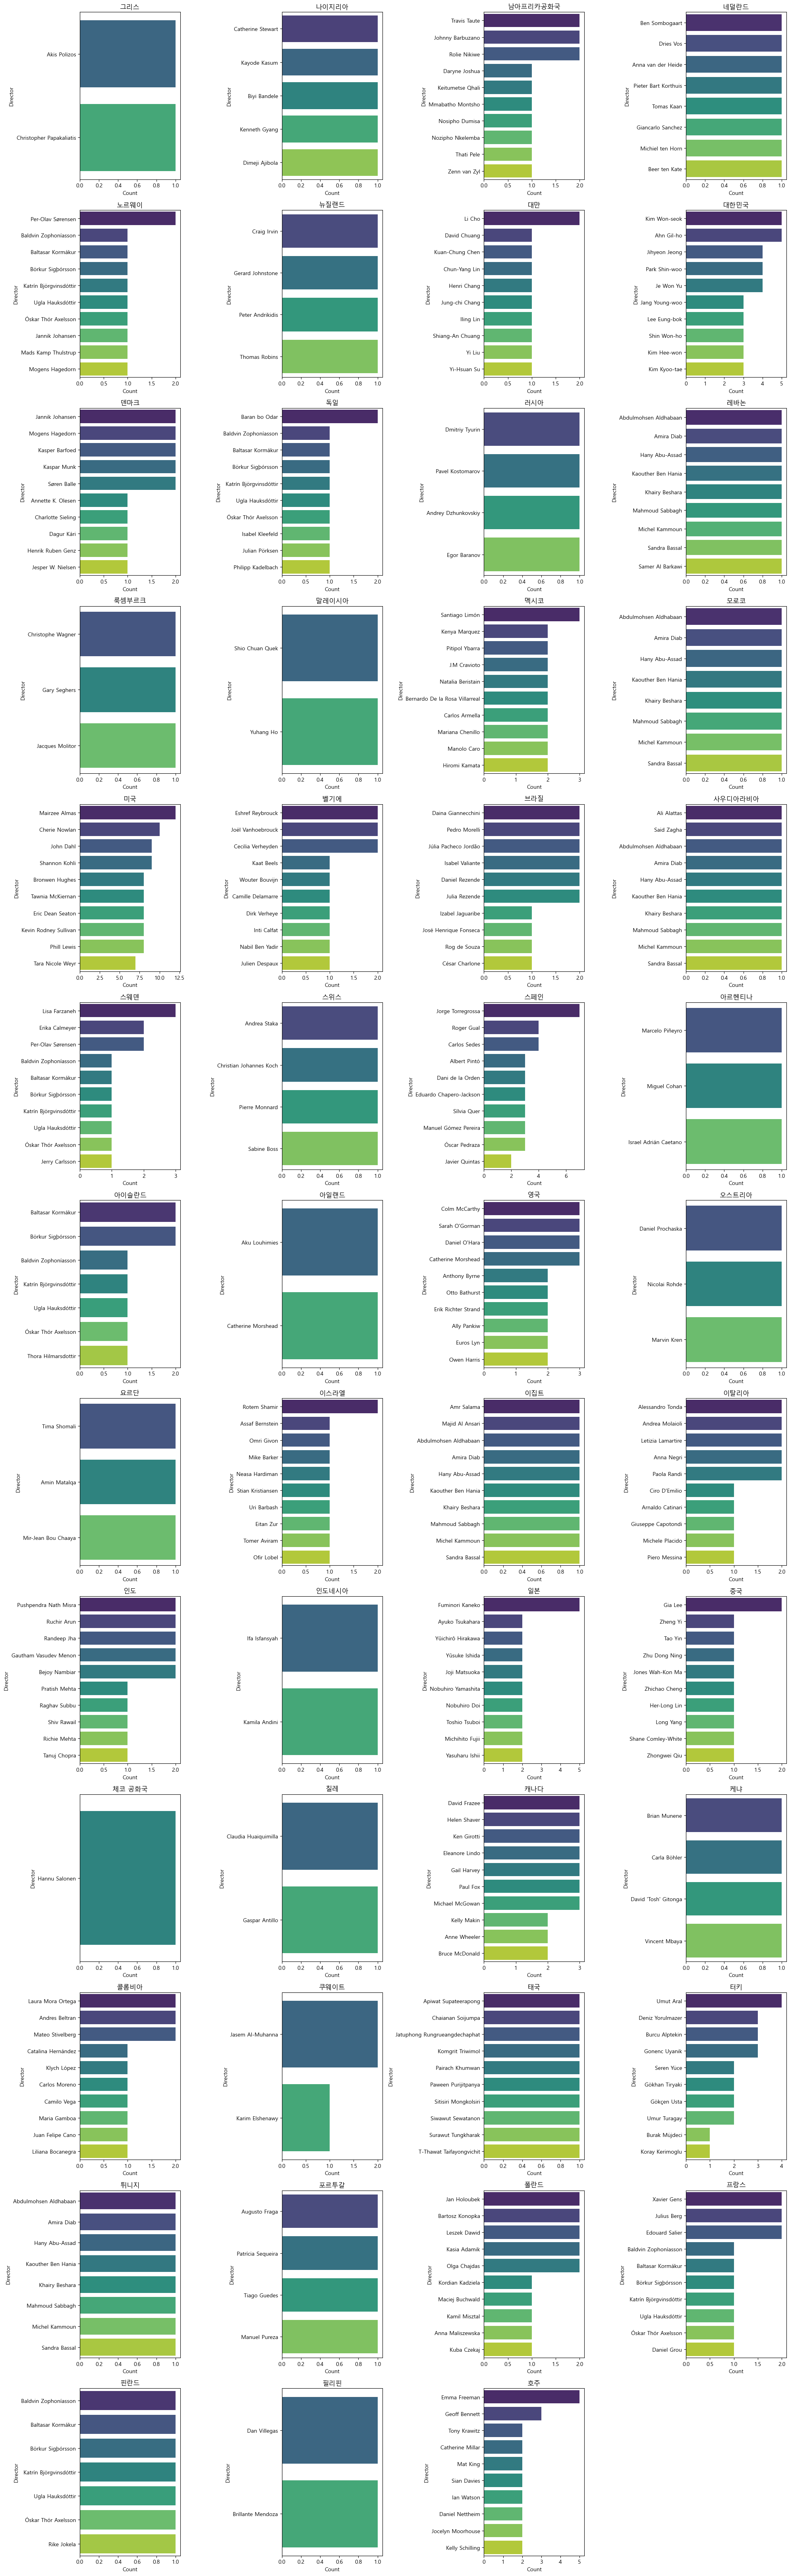

In [32]:
# subplot 생성
num_countries = len(top_directors_per_country)
num_rows = (num_countries // 4) + 1
plt.figure(figsize=(20, 5 * num_rows))

for idx, (country, directors) in enumerate(top_directors_per_country.items()):
    directors_df = pd.DataFrame(directors, columns=['Director', 'Count'])
    
    plt.subplot(num_rows, 4, idx + 1)
    sns.barplot(x='Count', y='Director', data=directors_df, palette='viridis')
    plt.title(country)
    plt.tight_layout()

plt.show()

Country: 미국
Mairzee Almas: 12
Cherie Nowlan: 10
John Dahl: 9
Shannon Kohli: 9
Bronwen Hughes: 8
Tawnia McKiernan: 8
Eric Dean Seaton: 8
Kevin Rodney Sullivan: 8
Phill Lewis: 8
Tara Nicole Weyr: 7

Country: 대한민국
Kim Won-seok: 5
Ahn Gil-ho: 5
Jihyeon Jeong: 4
Park Shin-woo: 4
Je Won Yu: 4
Jang Young-woo: 3
Lee Eung-bok: 3
Shin Won-ho: 3
Kim Hee-won: 3
Kim Kyoo-tae: 3

Country: 영국
Colm McCarthy: 3
Sarah O'Gorman: 3
Daniel O'Hara: 3
Catherine Morshead: 3
Anthony Byrne: 2
Otto Bathurst: 2
Erik Richter Strand: 2
Ally Pankiw: 2
Euros Lyn: 2
Owen Harris: 2

Country: 스페인
Jorge Torregrossa: 7
Roger Gual: 4
Carlos Sedes: 4
Albert Pintó: 3
Dani de la Orden: 3
Eduardo Chapero-Jackson: 3
Sílvia Quer: 3
Manuel Gómez Pereira: 3
Óscar Pedraza: 3
Javier Quintas: 2

Country: 일본
Fuminori Kaneko: 5
Ayuko Tsukahara: 2
Yûichirô Hirakawa: 2
Yûsuke Ishida: 2
Joji Matsuoka: 2
Nobuhiro Yamashita: 2
Nobuhiro Doi: 2
Toshio Tsuboi: 2
Michihito Fujii: 2
Yasuharu Ishii: 2



C:\Users\user\AppData\Local\Temp\ipykernel_20368\2964832629.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Director', data=directors_df, palette='viridis')
C:\Users\user\AppData\Local\Temp\ipykernel_20368\2964832629.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Director', data=directors_df, palette='viridis')
C:\Users\user\AppData\Local\Temp\ipykernel_20368\2964832629.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Director', data=directors_df, palette='viridis')
C:\Users\user\AppDa

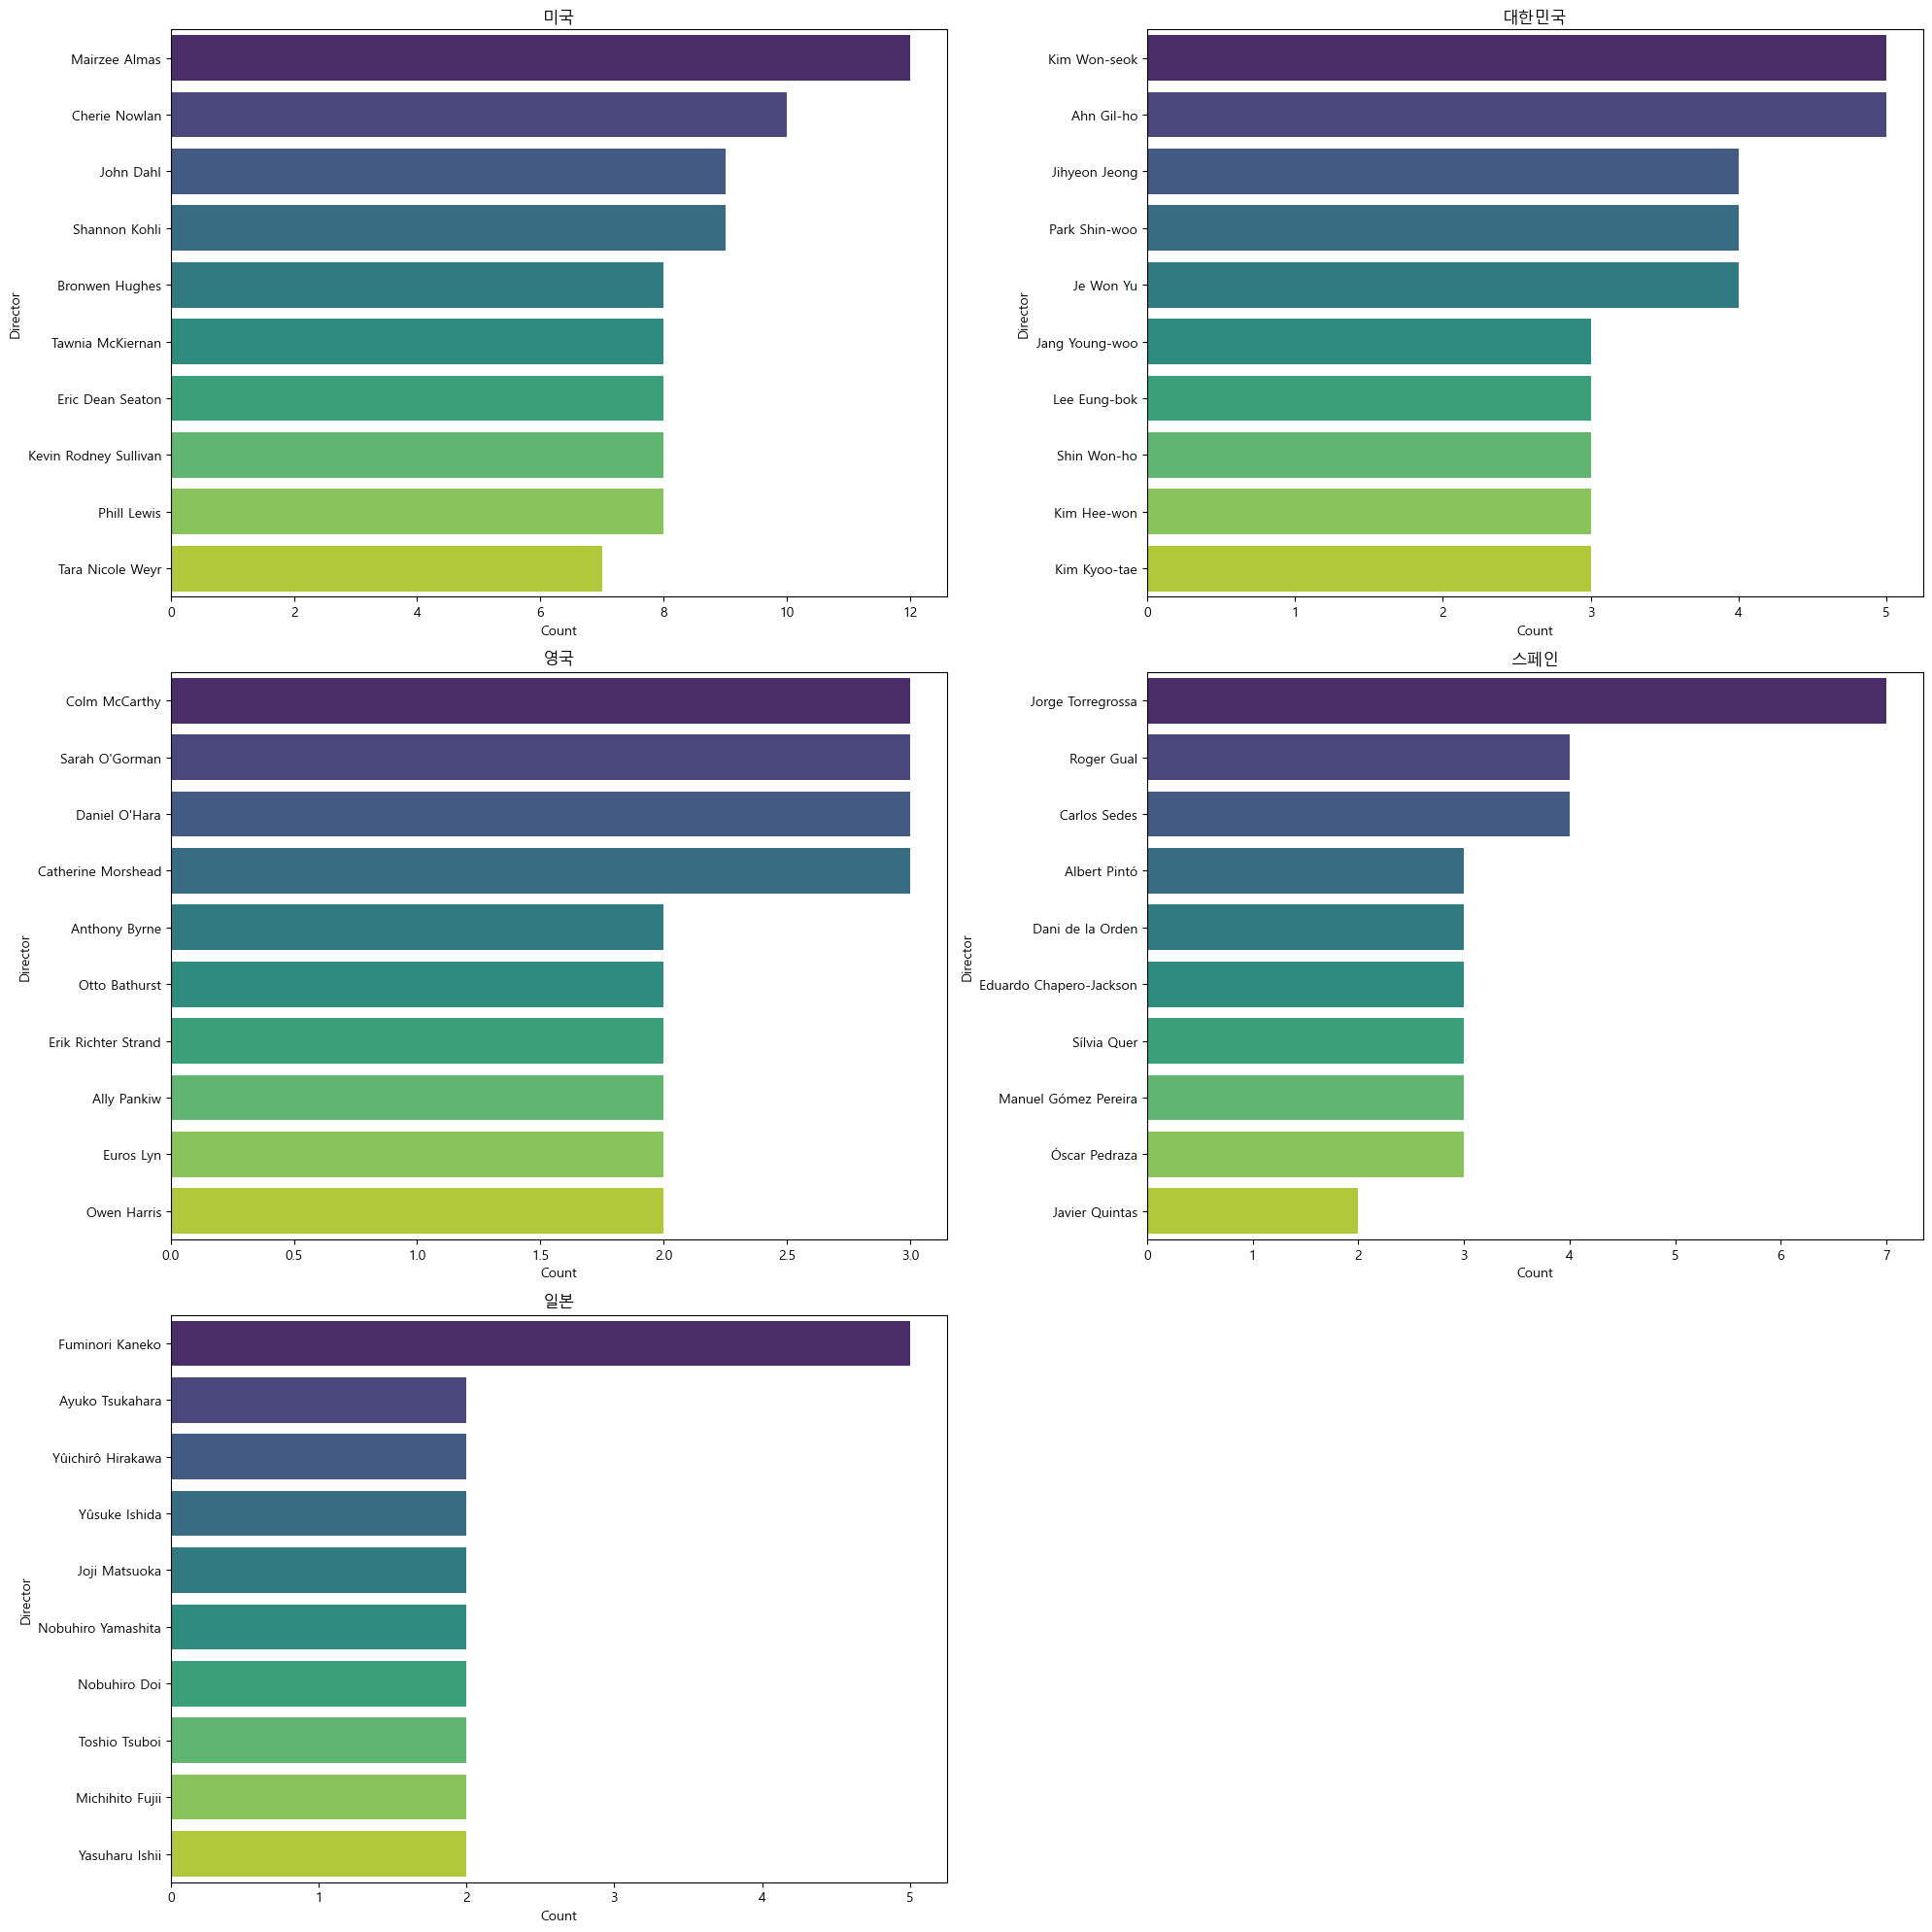

In [33]:
# 넷플릭스 드라마를 가장 많이 제작한 국가 Top 5 추출
top_countries = df['production_country'].value_counts().head(5).index.tolist()

# 감독 정보가 있는 국가별 데이터 필터링
df_filtered = df[df['production_country'].apply(lambda x: any(country in x for country in top_countries))]

# 국가별 감독 리스트를 만들고 상위 10명 추출
top_directors_per_country = {}
for country in top_countries:
    country_df = df_filtered[df_filtered['production_country'].str.contains(country)]
    all_directors = country_df['director'].explode().tolist()
    most_common_directors = Counter(all_directors).most_common(10)
    top_directors_per_country[country] = most_common_directors

# 결과 출력
for country, directors in top_directors_per_country.items():
    print(f"Country: {country}")
    for director, count in directors:
        print(f"{director}: {count}")
    print()

# 그래프 출력
plt.figure(figsize=(20, 20))
for idx, (country, directors) in enumerate(top_directors_per_country.items(), start=1):
    directors_df = pd.DataFrame(directors, columns=['Director', 'Count'])
    plt.subplot(3, 2, idx)
    sns.barplot(x='Count', y='Director', data=directors_df, palette='viridis')
    plt.title(country)
plt.tight_layout()
plt.show()

In [34]:
# 결측치 처리
df['production_country'] = df['production_country'].fillna('')
df['writer'] = df['writer'].fillna('[]').apply(eval)

# 나라와 작가 데이터프레임 생성
country_writers = []

for index, row in df.iterrows():
    countries = row['production_country'].split(',')
    writers = row['writer']
    for country in countries:
        for writer in writers:
            country_writers.append({'country': country.strip(), 'writer': writer.strip()})

country_writers_df = pd.DataFrame(country_writers)

# 각 나라별 상위 10명의 감독 추출
top_writers_per_country = {}

for country, group in country_writers_df.groupby('country'):
    writer_counts = Counter(group['writer'])
    top_writers = writer_counts.most_common(10)
    top_writers_per_country[country] = top_writers

# 결과 출력
for country, writers in top_writers_per_country.items():
    print(f"Country: {country}")
    for writer, count in writers:
        print(f"  {writer}: {count} 작품")
    print()

Country: 그리스
  Christopher Papakaliatis: 1 작품

Country: 나이지리아
  Chiemeka Osuagwu: 1 작품
  Chinaza Onuzo: 1 작품
  Damilola Elebe: 1 작품
  Craig Freimond: 1 작품
  Temidayo Makanjuola: 1 작품
  Zelipa Zulu: 1 작품
  Ayomikun Paseda: 1 작품
  Donald Tombia: 1 작품
  Shirleyann Ede: 1 작품
  Xavier Ighorodje: 1 작품

Country: 남아프리카공화국
  Daryne Joshua: 2 작품
  Meesha Aboo: 2 작품
  Travis Taute: 2 작품
  Tristram Atkins: 2 작품
  Lwazi Mvusi: 2 작품
  Sunni Faba-Gutu: 2 작품
  Steven Pillemer: 2 작품
  Sydney Dire: 2 작품
  Chinaka Iwunze: 1 작품
  Mmabatho Montsho: 1 작품

Country: 네덜란드
  Bram Renders: 1 작품
  Ian Ginn: 1 작품
  Karin van der Meer: 1 작품
  Maarten Almekinders: 1 작품
  Marnie Blok: 1 작품
  Philip Delmaar: 1 작품
  Franky Ribbens: 1 작품
  Fred Saueressig: 1 작품
  Lotte Tabbers: 1 작품
  Pieter Bart Korthuis: 1 작품

Country: 노르웨이
  Per-Olav Sørensen: 2 작품
  Baltasar Kormákur: 1 작품
  Clive Bradley: 1 작품
  Davíð Már Stefánsson: 1 작품
  Gagga Jonsdottir: 1 작품
  Holly Phillips: 1 작품
  Jóhann Ævar Grímsson: 1 작품
  Klaus Zimmerman

C:\Users\user\AppData\Local\Temp\ipykernel_20368\3448255175.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Writer', data=writers_df, palette='viridis')
C:\Users\user\AppData\Local\Temp\ipykernel_20368\3448255175.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Writer', data=writers_df, palette='viridis')
C:\Users\user\AppData\Local\Temp\ipykernel_20368\3448255175.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Writer', data=writers_df, palette='viridis')
C:\Users\user\AppData\Local\Tem

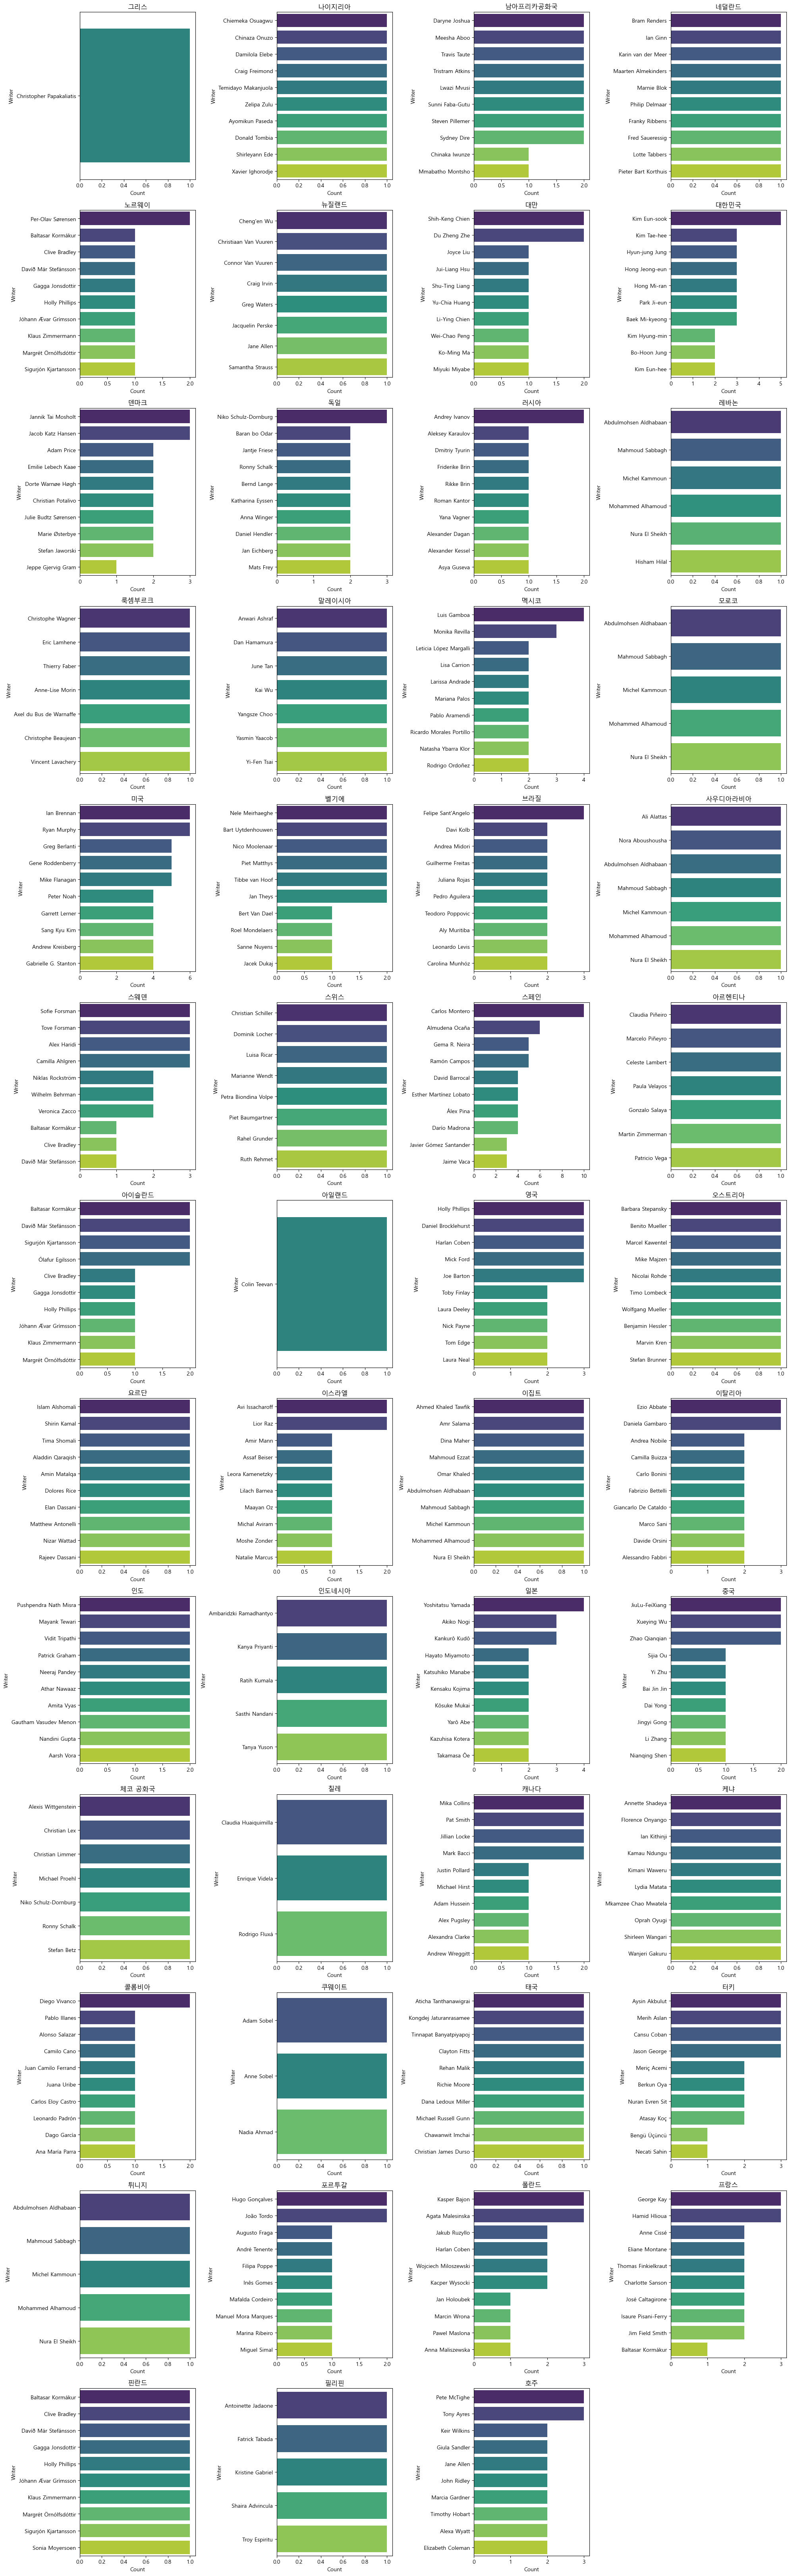

In [37]:
# subplot 생성
num_countries = len(top_writers_per_country)
num_rows = (num_countries // 4) + 1
plt.figure(figsize=(20, 5 * num_rows))

for idx, (country, writers) in enumerate(top_writers_per_country.items()):
    writers_df = pd.DataFrame(writers, columns=['Writer', 'Count'])
    
    plt.subplot(num_rows, 4, idx + 1)
    sns.barplot(x='Count', y='Writer', data=writers_df, palette='viridis')
    plt.title(country)
    plt.tight_layout()

plt.show()

Country: 미국
Ian Brennan: 6
Ryan Murphy: 6
Greg Berlanti: 5
Gene Roddenberry: 5
Mike Flanagan: 5
Peter Noah: 4
Garrett Lerner: 4
Sang Kyu Kim: 4
Andrew Kreisberg: 4
Gabrielle G. Stanton: 4

Country: 대한민국
Kim Eun-sook: 5
Kim Tae-hee: 3
Hyun-jung Jung: 3
Hong Jeong-eun: 3
Hong Mi-ran: 3
Park Ji-eun: 3
Baek Mi-kyeong: 3
Kim Hyung-min: 2
Bo-Hoon Jung: 2
Kim Eun-hee: 2

Country: 영국
Holly Phillips: 3
Daniel Brocklehurst: 3
Harlan Coben: 3
Mick Ford: 3
Joe Barton: 3
Toby Finlay: 2
Laura Deeley: 2
Nick Payne: 2
Tom Edge: 2
Laura Neal: 2

Country: 스페인
Carlos Montero: 10
Almudena Ocaña: 6
Gema R. Neira: 5
Ramón Campos: 5
David Barrocal: 4
Esther Martínez Lobato: 4
Álex Pina: 4
Darío Madrona: 4
Javier Gómez Santander: 3
Jaime Vaca: 3

Country: 일본
Yoshitatsu Yamada: 4
Akiko Nogi: 3
Kankurô Kudô: 3
Hayato Miyamoto: 2
Katsuhiko Manabe: 2
Kensaku Kojima: 2
Kôsuke Mukai: 2
Yarô Abe: 2
Kazuhisa Kotera: 2
Takamasa Ôe: 2



C:\Users\user\AppData\Local\Temp\ipykernel_20368\1899595310.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Writer', data=writers_df, palette='viridis')
C:\Users\user\AppData\Local\Temp\ipykernel_20368\1899595310.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Writer', data=writers_df, palette='viridis')
C:\Users\user\AppData\Local\Temp\ipykernel_20368\1899595310.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Writer', data=writers_df, palette='viridis')
C:\Users\user\AppData\Local\Tem

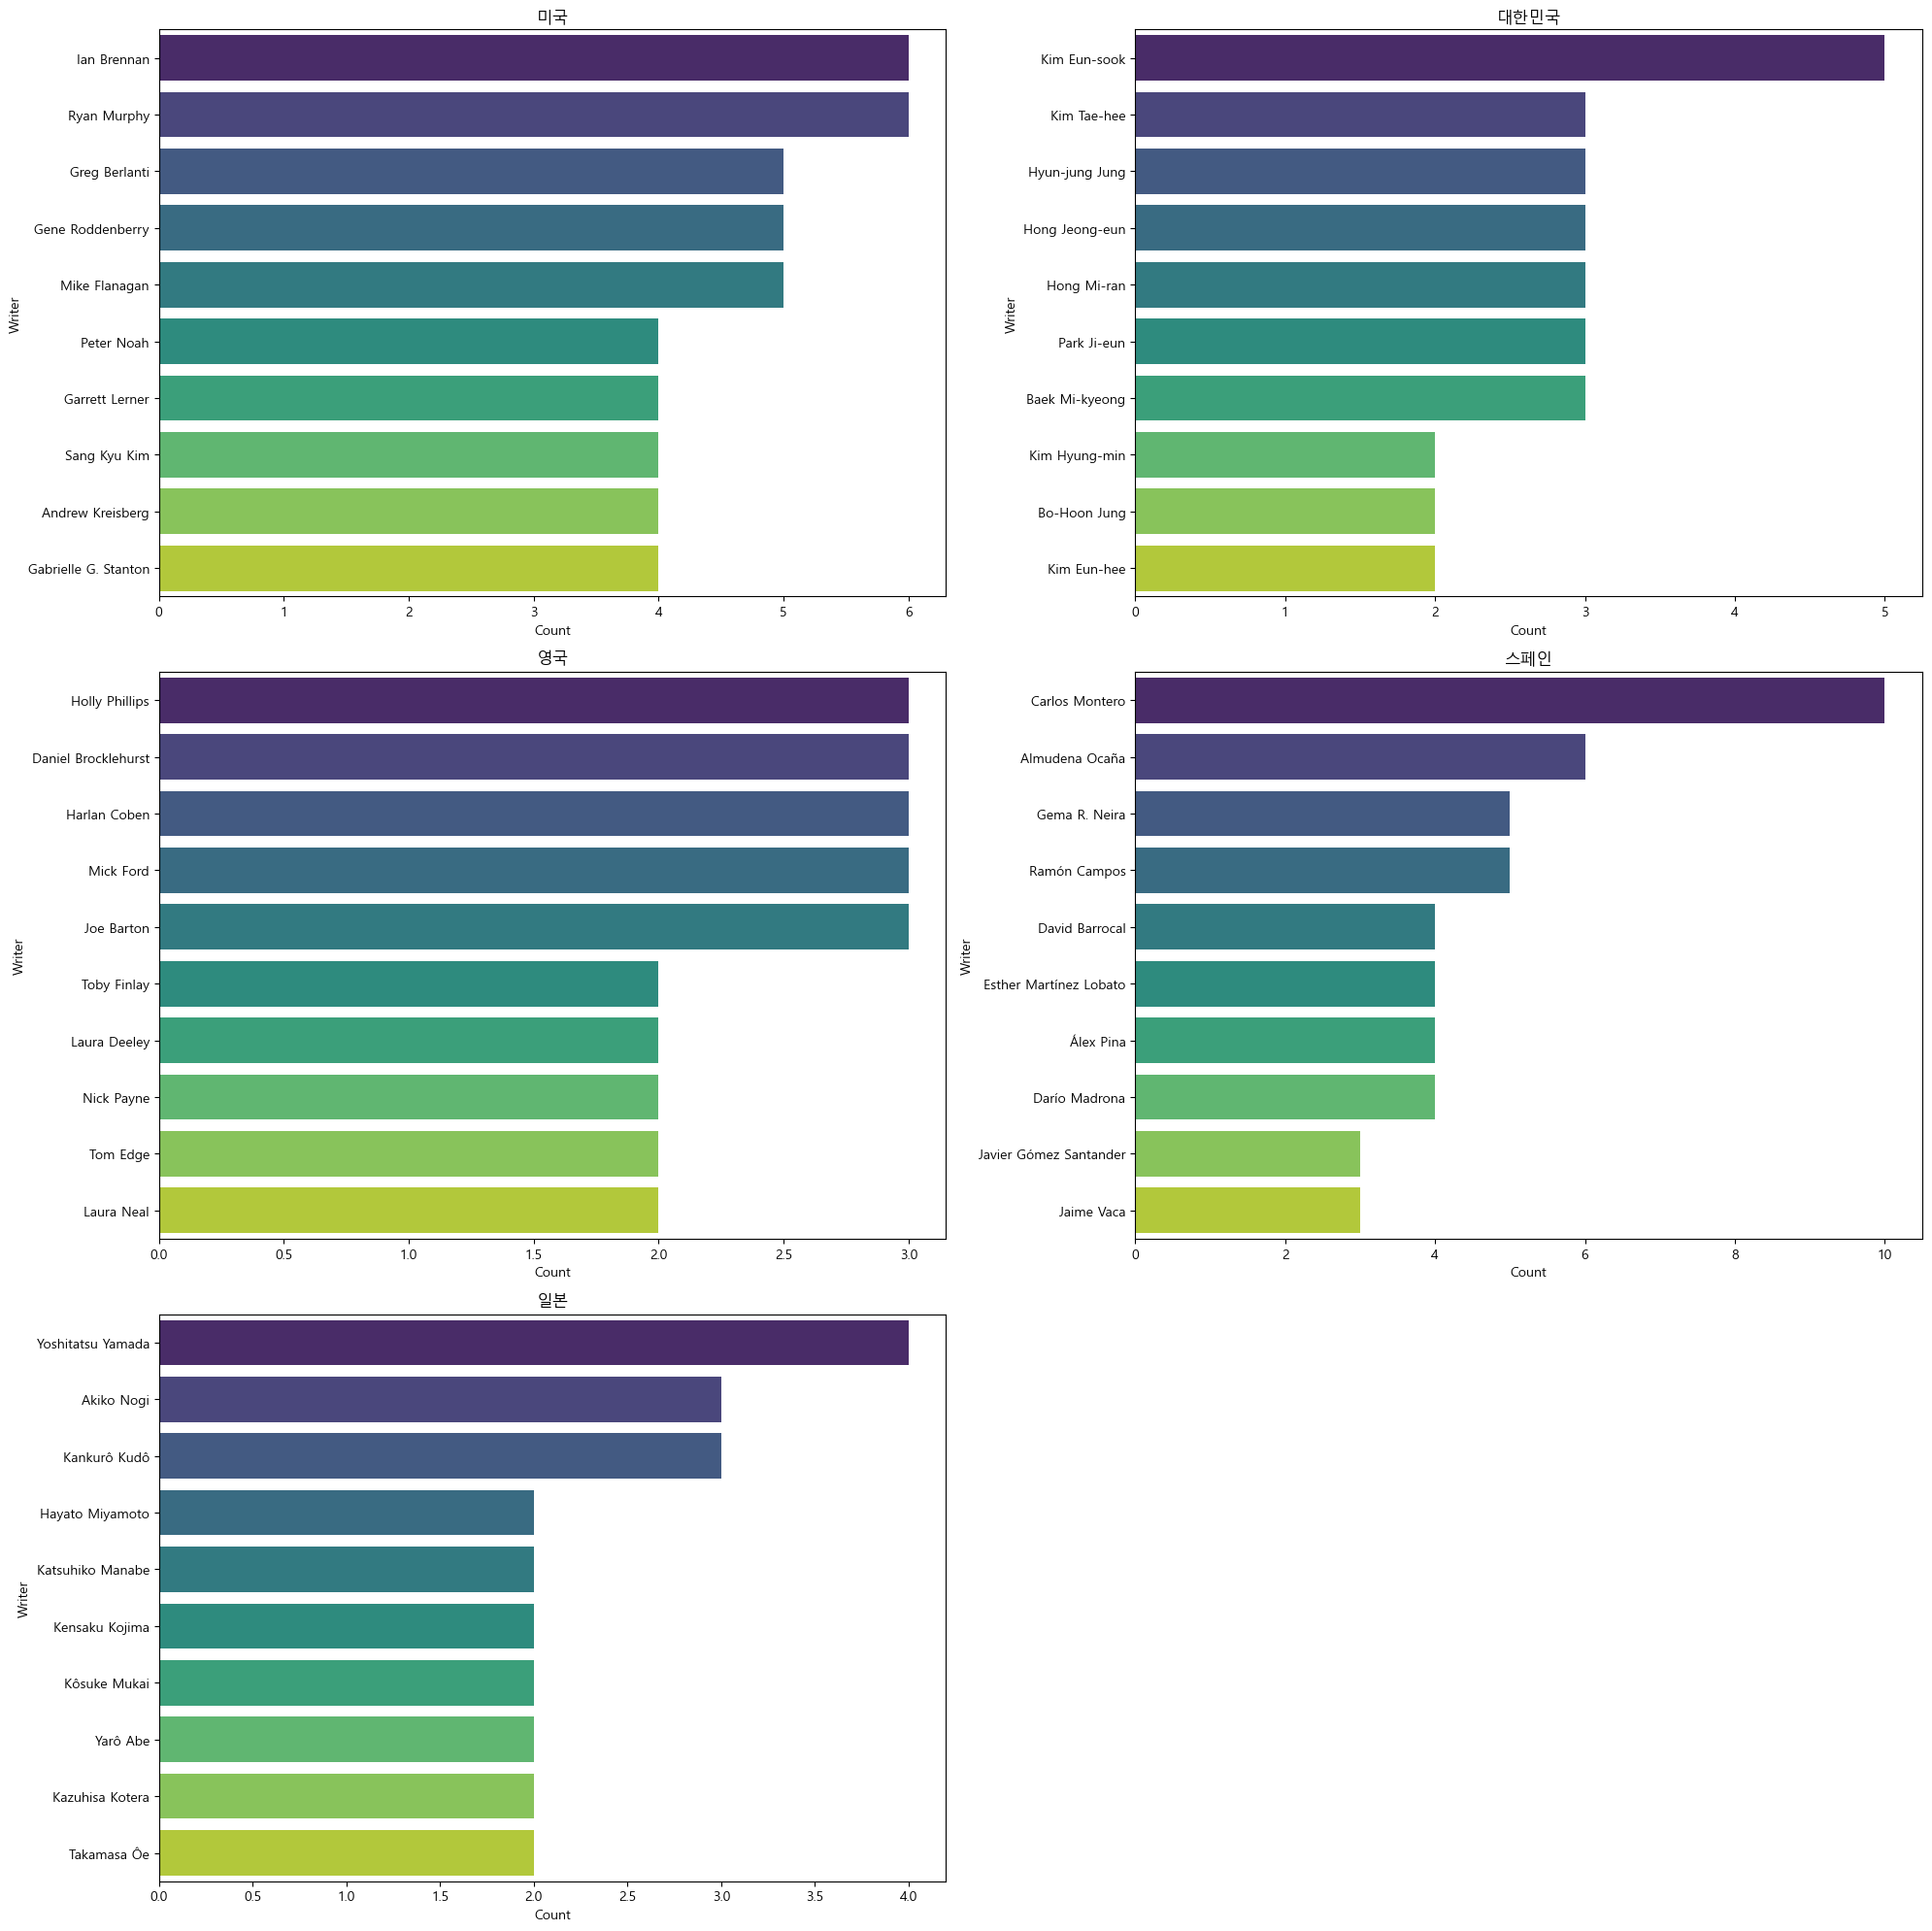

In [38]:
# 넷플릭스 드라마를 가장 많이 제작한 국가 Top 5 추출
top_countries = df['production_country'].value_counts().head(5).index.tolist()

# 감독 정보가 있는 국가별 데이터 필터링
df_filtered = df[df['production_country'].apply(lambda x: any(country in x for country in top_countries))]

# 국가별 감독 리스트를 만들고 상위 10명 추출
top_writers_per_country = {}
for country in top_countries:
    country_df = df_filtered[df_filtered['production_country'].str.contains(country)]
    all_writers = country_df['writer'].explode().tolist()
    most_common_writers = Counter(all_writers).most_common(10)
    top_writers_per_country[country] = most_common_writers

# 결과 출력
for country, writers in top_writers_per_country.items():
    print(f"Country: {country}")
    for writer, count in writers:
        print(f"{writer}: {count}")
    print()

# 그래프 출력
plt.figure(figsize=(20, 20))
for idx, (country, writers) in enumerate(top_writers_per_country.items(), start=1):
    writers_df = pd.DataFrame(writers, columns=['Writer', 'Count'])
    plt.subplot(3, 2, idx)
    sns.barplot(x='Count', y='Writer', data=writers_df, palette='viridis')
    plt.title(country)
plt.tight_layout()
plt.show()

In [ ]:
미국: Ian Brennan(6개) - 다머, 어둠속의 감시자, 오,할리우드, 래치드, 더 폴리티션(시즌2개), 홀스턴
대한미국: 김은숙(5개) - 도깨비, 더 글로리, 미스터 선샤인, 상속자들, 더 킹:영원의 군주
영국: Holly Phillips(3개) - 겟 이븐, 트랩트(시즌2개), 겟 이븐: 우리는 치어 스쿼드
스페인: Carlos Montero
일본: Yoshitatsu Yamada -


In [39]:
# total_season_num이 2 이상인 행 필터링
filtered_df = df[df['total_season_num'] >= 2]
filtered_df

,Unnamed: 0,korean_title,english_title,year,total_season_num,runtime,genre,age_rating,production_country,total_count,...,season_13,season_14,season_15,season_16,season_17,director,writer,actor,imdb_title,imdb_url
3,3,스위트 투스: 사슴뿔을 가진 소년,Sweet Tooth,2021,2,52,"SF, 드라마, 판타지, 액션",15,미국,68000,...,NaN,NaN,NaN,NaN,NaN,"[Alexis Ostrander, Carol Banker, Ciarán Foy, J...","[Beth Schwartz, Bo Yeon Kim, Carly Woodworth, ...","['Nonso Anozie', 'Christian Convery', 'Stefani...",Sweet Tooth (TV Series 2021),https://www.imdb.com/title/tt12809988/
4,4,스위트홈,Sweet Home,2020,2,60,"스릴러, 드라마, 판타지, 공포, SF, 범죄",19,대한민국,33000,...,NaN,NaN,NaN,NaN,NaN,"[Jang Young-woo, Lee Eung-bok, Park So-hyun]","[Hong So-ri, Hwang Young-Chan, Kim Hyung-min, ...","['Song Kang', 'Lee Jin-wook', 'Lee Si-young', ...",Sweet Home (TV Series 2020),https://www.imdb.com/title/tt11612120/
6,6,굿 닥터,The Good Doctor,2017,6,43,드라마,15,미국,116000,...,NaN,NaN,NaN,NaN,NaN,"[Aaron Rottinghaus, Allison Liddi-Brown, Alric...","[Adam Scott Weissman, April Fitzsimmons, Bill ...","['Freddie Highmore', 'Richard Schiff', 'Hill H...",The Good Doctor (TV Series 2017–2024),https://www.imdb.com/title/tt6470478/
7,7,워킹 데드,The Walking Dead,2010,11,46,"드라마, SF, 액션, 공포, 스릴러",19,미국,1100000,...,NaN,NaN,NaN,NaN,NaN,"[Aisha Tyler, Alrick Riley, Avi Youabian, Bill...","[Adam Fierro, Angela Kang, Channing Powell, Ch...","['Norman Reedus', 'Melissa McBride', 'Lauren C...",The Walking Dead (TV Series 2010–2022),https://www.imdb.com/title/tt1520211/
8,8,"비르기트: 왕국, 권력, 영광",Borgen - Power & Glory,2022,4,58,"전쟁, 드라마, Made in Europe",15,덴마크,30000,...,NaN,NaN,NaN,NaN,NaN,"[Annette K. Olesen, Charlotte Sieling, Dagur K...","[Adam Price, Emilie Lebech Kaae, Jannik Tai Mo...","['Sidse Babett Knudsen', 'Birgitte Hjort Søren...",Borgen (TV Series 2010–2022),https://www.imdb.com/title/tt1526318/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,869,꽃들의 집,The House of Flowers,2018,3,31,"드라마, 코미디",19,멕시코,8600,...,NaN,NaN,NaN,NaN,NaN,"[Alberto Belli, Gabriel Nuncio, Manolo Caro, S...","[Alexandro Aldrete, Dariela Pérez Hernández, G...","['Cecilia Suárez', 'Claudette Maillé', 'Dario ...",The House of Flowers (TV Series 2018–2020),https://www.imdb.com/title/tt8387348/
870,870,우리가 몰랐던 그녀,She,2020,2,41,"드라마, 범죄",19,인도,6500,...,NaN,NaN,NaN,NaN,NaN,"[Arif Ali, Avinash Das]","[Anuja Gondhalekar, Divya Johry, Imtiaz Ali, M...","['Shivani Rangole', 'Aditi Sudhir Pohankar', '...",She (TV Series 2020),https://www.imdb.com/title/tt11905720/
882,882,악플러는 꺼져주세요,Haters Back Off,2016,2,30,"코미디, 드라마, 가족, 로맨스",15,미국,7900,...,NaN,NaN,NaN,NaN,NaN,"[Andrew Gaynord, Benjamin Berman, Brian Dannel...","[Christopher Ballinger, Colleen Ballinger, Gig...","['Colleen Ballinger', 'Angela Kinsey', 'France...",Haters Back Off! (TV Series 2016–2017),https://www.imdb.com/title/tt5467814/
883,883,거짓말의 거짓말,Mythomaniac,2019,2,46,"코미디, 드라마",19,프랑스,1600,...,NaN,NaN,NaN,NaN,NaN,[Fabrice Gobert],"[Anne Berest, Fabrice Gobert, Lola Resch]","['Marina Hands', 'Mathieu Demy', 'Jérémy Gille...",Mythomaniac (TV Series 2019–2021),https://www.imdb.com/title/tt10677432/


In [40]:
len(filtered_df)

267

In [45]:
from datetime import datetime

# 시즌별 데이터를 담을 리스트 초기화
season_columns = [f'season_{i}' for i in range(1, 18)]  # 시즌 1부터 시즌 17까지

# 결과를 담을 리스트 초기화
season_gaps = []

# 각 행을 순회하며 시즌 간격을 계산
for idx, row in df.iterrows():
    # 시즌 데이터를 담을 리스트 초기화
    seasons = []
    
    for season_col in season_columns:
        if season_col in row and pd.notnull(row[season_col]):
            season_data = eval(row[season_col])  # 문자열을 dict 형태로 변환
            seasons.append(season_data)
    
    # 시즌이 2개 이상인 경우에만 계산
    if len(seasons) > 1:
        for i in range(len(seasons) - 1):
            try:
                # 현재 시즌의 마지막 에피소드 방영일자
                last_episode_current_season = list(seasons[i].values())[-1][2]
                if last_episode_current_season:
                    last_air_date = datetime.strptime(last_episode_current_season, "%a, %b %d, %Y")
                else:
                    continue
                
                # 다음 시즌의 첫 번째 에피소드 방영일자
                first_episode_next_season = list(seasons[i + 1].values())[0][2]
                if first_episode_next_season:
                    next_air_date = datetime.strptime(first_episode_next_season, "%a, %b %d, %Y")
                else:
                    continue
                
                # 시즌 간의 간격 계산
                gap_days = (next_air_date - last_air_date).days
                gap_years_months = f"{gap_days // 365}년 {gap_days % 365 // 30}개월"
                
                # 결과 저장
                season_gaps.append({
                    'korean_title': row['korean_title'],
                    'season': f"Season {i + 1} to Season {i + 2}",
                    'gap_days': gap_days,
                    'gap_years_months': gap_years_months
                })
            except KeyError as e:
                print(f"KeyError: {e} in row {idx} for season {i + 1} to season {i + 2}")
            except ValueError as e:
                print(f"ValueError: {e} in row {idx} for season {i + 1} to season {i + 2}")

# 결과 데이터 프레임 생성
season_gaps_df = pd.DataFrame(season_gaps)

# 결과 출력
season_gaps_df.head()

,korean_title,season,gap_days,gap_years_months
0,스위트 투스: 사슴뿔을 가진 소년,Season 1 to Season 2,692,1년 10개월
1,스위트홈,Season 1 to Season 2,1078,2년 11개월
2,굿 닥터,Season 1 to Season 2,182,0년 6개월
3,굿 닥터,Season 2 to Season 3,196,0년 6개월
4,굿 닥터,Season 3 to Season 4,217,0년 7개월


In [52]:
season_gaps_df[season_gaps_df['korean_title'] == '하트랜드']

,korean_title,season,gap_days,gap_years_months
165,하트랜드,Season 1 to Season 2,224,0년 7개월
166,하트랜드,Season 2 to Season 3,553,1년 6개월
167,하트랜드,Season 3 to Season 4,175,0년 5개월
168,하트랜드,Season 4 to Season 5,175,0년 5개월
169,하트랜드,Season 5 to Season 6,182,0년 6개월
170,하트랜드,Season 6 to Season 7,168,0년 5개월
171,하트랜드,Season 7 to Season 8,189,0년 6개월
172,하트랜드,Season 8 to Season 9,196,0년 6개월
173,하트랜드,Season 9 to Season 10,182,0년 6개월
174,하트랜드,Season 10 to Season 11,273,0년 9개월


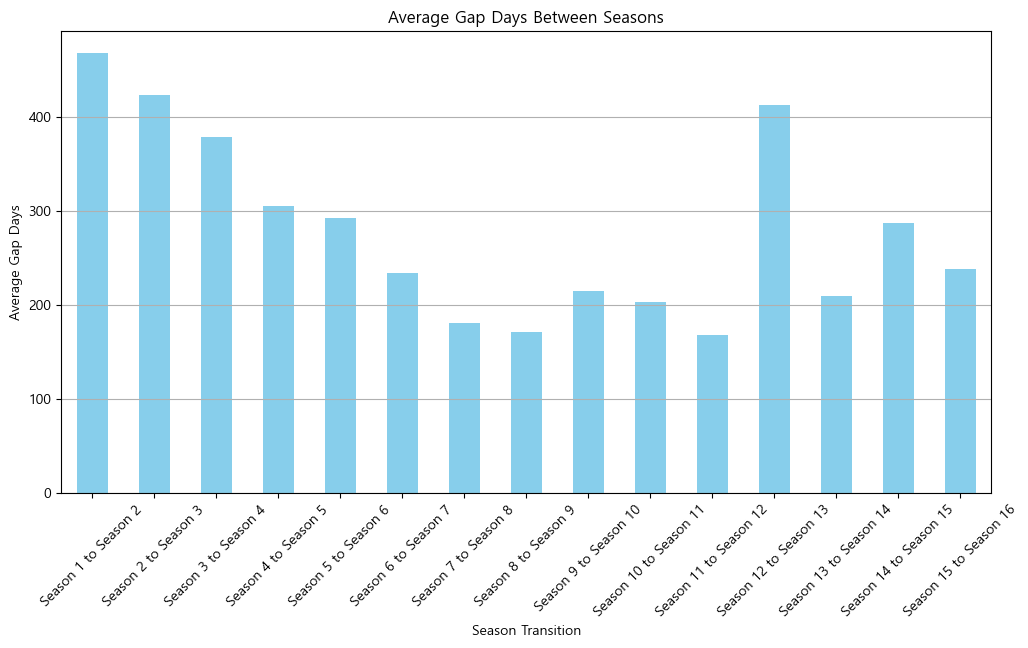

In [47]:
# 시즌 간의 gap_days 평균 계산
average_gap_days = season_gaps_df.groupby('season')['gap_days'].mean()

# 시즌 순서 정렬
sorted_season_transitions = sorted(average_gap_days.index, key=lambda x: (int(x.split()[1]), int(x.split()[4])))

# 그래프 생성
plt.figure(figsize=(12, 6))
average_gap_days = average_gap_days.reindex(sorted_season_transitions)
average_gap_days.plot(kind='bar', color='skyblue')
plt.xlabel('Season Transition')
plt.ylabel('Average Gap Days')
plt.title('Average Gap Days Between Seasons')
plt.xticks(rotation=45)
plt.grid(axis='y')

# 그래프 출력
plt.show()

In [53]:
# 시즌 간의 gap_days 평균 계산
average_gap_days = season_gaps_df.groupby('season')['gap_days'].mean()

# 시즌 순서 정렬
sorted_season_transitions = sorted(average_gap_days.index, key=lambda x: (int(x.split()[1]), int(x.split()[4])))

# 정렬된 평균 gap_days 데이터프레임
average_gap_days = average_gap_days.reindex(sorted_season_transitions)

# 평균 gap_days 출력
average_gap_days

season
Season 1 to Season 2      467.503759
Season 2 to Season 3      423.257353
Season 3 to Season 4      378.812500
Season 4 to Season 5      304.800000
Season 5 to Season 6      292.222222
Season 6 to Season 7      233.772727
Season 7 to Season 8      181.222222
Season 8 to Season 9      171.000000
Season 9 to Season 10     215.333333
Season 10 to Season 11    203.000000
Season 11 to Season 12    168.000000
Season 12 to Season 13    413.000000
Season 13 to Season 14    210.000000
Season 14 to Season 15    287.000000
Season 15 to Season 16    238.000000
Name: gap_days, dtype: float64

1. 시즌 간격의 변동성:
Season 1 to Season 2 간의 평균 간격이 약 467.5일로 가장 길며, 이후 시즌 간격은 점차적으로 줄어드는 경향을 보임.
특히 Season 6 to Season 7과 Season 7 to Season 8의 평균 간격이 크게 감소함.
드라마의 인기가 올라감에 따라 시즌 간의 제작 간격이 단축되었을 가능성이 있음

2. 불규칙한 간격:
중간중간에 간격이 크게 늘어나는 시즌이 존재. 예를 들어 Season 12 to Season 13의 평균 간격은 413일로, 이전 시즌 간격보다 크게 증가.
제작상의 문제, 배우의 스케줄, 제작비 문제, 혹은 기타 외부 요인으로 인해 특정 시즌의 제작이 지연되었을 수 있음

3. 일정한 간격으로 돌아오는 패턴:
Season 3 to Season 4 이후 간격이 다시 감소.  제작 일정이 다시 안정화?
Season 9 to Season 10, Season 10 to Season 11, Season 11 to Season 12 간격이 비교적 짧아지면서 일정한 패턴이 있음

4. 장기적 트렌드:
전반적으로 시즌 간의 간격이 점차 감소하는 추세. 드라마가 인기를 얻으면서 팬들을 유지하기 위해 제작 일정이 더 빠르게 조정되었을 가능성
시즌 간의 간격을 줄임으로써 팬들의 관심을 지속적으로 유지하고, 시청률을 높이기 위한 전략일 수 있음을 추측

In [54]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# 사용할 피처 선택
features = ['watchlist', 'user_review', 'critic_review']

# 결측값 처리
df = df.dropna(subset=features)

# 데이터 스케일링
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

In [55]:
# PCA 모델 생성 및 적용
pca = PCA(n_components=2)  # 주성분 2개로 축소
principal_components = pca.fit_transform(scaled_features)

# 결과 데이터프레임 생성
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# 원본 데이터프레임에 주성분 추가
df_pca = pd.concat([df.reset_index(drop=True), pca_df], axis=1)

# 주성분의 분산 설명 비율
print("Explained Variance Ratio: ", pca.explained_variance_ratio_)

Explained Variance Ratio:  [0.84765618 0.0924086 ]


In [ ]:
주성분 분석(PCA)을 통해 데이터의 차원을 축소한 후, 결과로 얻은 주성분의 분산 설명 비율을 분석해보겠습니다. 
사용한 피처=watchlist, user_review, critic_review 

첫 번째 주성분 (PC1): 원본 데이터의 분산 중 84.77%를 설명합니다.
두 번째 주성분 (PC2): 원본 데이터의 분산 중 9.24%를 설명합니다.
이 두 주성분이 원본 데이터의 분산 중 약 94.01%를 설명합니다 (0.84765618 + 0.0924086 = 0.94006478).

상세 분석
첫 번째 주성분 (PC1): 첫 번째 주성분이 84.77%의 분산을 설명하므로, watchlist, user_review, critic_review의 대부분의 변동성을 포착합니다. 이는 원본 데이터의 주요 정보를 담고 있으며, 데이터를 1차원으로 축소해도 원본 데이터의 변동성을 거의 유지할 수 있다는 것을 의미합니다.

두 번째 주성분 (PC2): 두 번째 주성분이 9.24%의 분산을 설명합니다. 첫 번째 주성분에 비해 훨씬 적은 비율이지만, 추가적인 분산을 설명합니다. 이는 첫 번째 주성분에서 잡아내지 못한 데이터의 변동성을 포착합니다.

결론
데이터의 주요 특징: 첫 번째 주성분만으로도 watchlist, user_review, critic_review 피처가 대부분의 정보를 담고 있음을 의미합니다. 즉, 데이터의 주요 변동 요인은 첫 번째 주성분을 통해 이해할 수 있습니다.

차원 축소의 유효성: 두 개의 주성분으로 원본 데이터의 94.01%의 분산을 설명할 수 있으므로, 차원 축소의 효과가 매우 높습니다. 이는 데이터의 차원을 줄이면서도 중요한 정보를 거의 잃지 않게 됩니다.

데이터 시각화와 분석: 두 주성분을 이용하여 2차원 평면에서 데이터를 시각화할 수 있습니다. 이를 통해 데이터의 분포와 군집을 쉽게 파악할 수 있습니다.

이 결과를 바탕으로 주성분 분석을 통해 데이터의 주요 변동 요인을 이해하고, 차원 축소된 데이터를 사용하여 다양한 분석과 예측 모델을 구축할 수 있습니다.

C:\Users\user\anaconda3\envs\ds_study\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


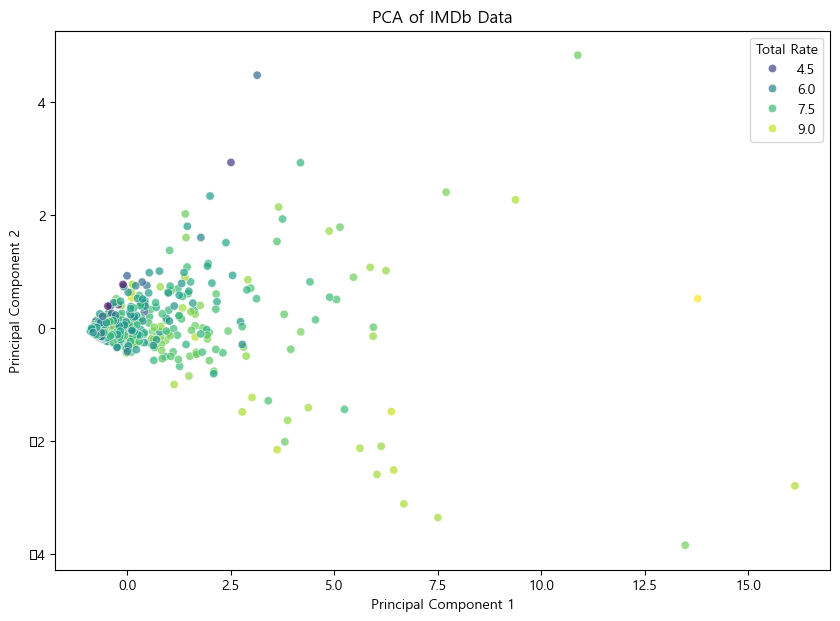

In [56]:
# 주성분 시각화
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='total_rate', palette='viridis', alpha=0.7)
plt.title('PCA of IMDb Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Total Rate')
plt.show()

In [ ]:
X축 (Principal Component 1): 첫 번째 주성분(PC1)입니다. 이 축은 데이터의 가장 큰 변동성을 설명합니다.
Y축 (Principal Component 2): 두 번째 주성분(PC2)입니다. 이 축은 첫 번째 주성분에서 설명하지 못한 두 번째로 큰 변동성을 설명합니다.

점들이 주로 왼쪽 아래에 밀집해 있는 것으로 보아 대부분의 데이터가 비슷한 특성을 가진다는 것을 알 수 있습니다.
오른쪽으로 갈수록 드라마들이 첫 번째 주성분에 의해 설명되는 변동성을 더 많이 가지며, 점들이 더 흩어지게 됩니다.
색상

파란색 점은 total_rate가 낮은 드라마, 노란색 점은 total_rate가 높은 드라마
대부분의 높은 total_rate 점들은 왼쪽 아래에 집중되어 있으며, 이는 total_rate가 데이터의 주요 변동 요인에 큰 영향을 받지 않는다는 것을 시사합니다.

결론
주성분 분석을 통해 watchlist, user_review, critic_review와 같은 피처에서 가장 큰 변동 요인을 파악할 수 있었습니다.
첫 번째 주성분이 데이터의 대부분의 변동성을 설명하며, 두 번째 주성분은 추가적인 정보를 제공합니다.
색상의 분포를 통해 total_rate와 주성분 간의 관계를 시각적으로 확인할 수 있습니다.

In [57]:
# 주성분과 타겟 변수 간의 상관관계
correlation_matrix = df_pca[['PC1', 'PC2', 'total_rate']].corr()
print("Correlation matrix:\n", correlation_matrix)

Correlation matrix:
                      PC1           PC2  total_rate
PC1         1.000000e+00  4.406865e-16    0.282549
PC2         4.406865e-16  1.000000e+00   -0.114077
total_rate  2.825493e-01 -1.140775e-01    1.000000


In [ ]:
PC1과 PC2의 상관관계: 4.406865e-16

거의 0에 가까운 값으로, PC1과 PC2는 서로 독립적입니다. 이는 PCA의 특성상 각 주성분이 서로 직교(독립)하도록 만들어지기 때문입니다.

PC1과 total_rate의 상관관계: 0.282549

양의 상관관계로, 약한 양의 상관관계를 나타냅니다. 이는 PC1이 증가할 때 total_rate도 증가하는 경향이 있음을 의미합니다. 그러나 이 상관계수는 강하지 않기 때문에 PC1이 total_rate를 설명하는 데 제한적일 수 있습니다.
PC2와 total_rate의 상관관계: -0.114077

음의 상관관계로, 매우 약한 음의 상관관계를 나타냅니다. 이는 PC2가 증가할 때 total_rate가 약간 감소하는 경향이 있음을 의미합니다. 그러나 이 상관계수도 강하지 않습니다.

결론
PC1이 total_rate와 약간의 양의 상관관계를 가지고 있습니다. 이는 첫 번째 주성분이 드라마의 total_rate에 영향을 미치는 일부 정보를 포함하고 있음을 시사합니다.
PC2는 total_rate와 거의 관계가 없습니다. 이는 두 번째 주성분이 total_rate를 잘 설명하지 못한다는 것을 의미합니다.
주성분 분석(PCA)은 데이터의 변동성을 최대한 설명하기 위해 만들어졌지만, 특정 타겟 변수(total_rate)와의 관계를 보장하지 않습니다. 상관관계가 낮은 이유는 total_rate가 watchlist, user_review, critic_review와 같은 피처들에 의해 완전히 설명되지 않기 때문일 수 있습니다.
추가 분석으로 다른 피처를 포함시키거나, 비선형 관계를 고려한 모델을 사용하여 total_rate를 더 잘 예측할 수 있는지 확인해 볼 수 있습니다. Random Forest나 다른 회귀 모델을 통해 더 나은 예측 성능을 얻을 수도 있습니다.
이 상관관계 행렬은 주성분과 total_rate 간의 관계를 이해하는 데 유용하며, 주성분 분석이 데이터의 주요 변동 요인을 설명하는 데 효과적이라는 것을 보여줍니다.

In [62]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 사용한 데이터 프레임과 피처들
features = ['watchlist', 'total_rate', 'total_count', 'popularity', 'user_review', 'critic_review']
df = pd.read_excel("../data/imdb_final_4_s_num_수정본_최종.xlsx")

# 결측값 처리
df[features] = df[features].fillna(0)

# 데이터 스케일링
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

# PCA 적용
pca = PCA(n_components=1)
principal_components = pca.fit_transform(scaled_features)
pca_weights = pca.components_[0]

# 가중치 딕셔너리 생성
weights = {features[i]: pca_weights[i] for i in range(len(features))}

# combined_success_score 계산
df['combined_success_score'] = df.apply(
    lambda row: sum(row[feature] * weights[feature] for feature in features),
    axis=1
)

# combined_success_score 표준화
scaler = MinMaxScaler()
df['normalized_success_score'] = scaler.fit_transform(df[['combined_success_score']])

# 데이터 프레임 확인
df[['korean_title', 'combined_success_score', 'normalized_success_score']].head()

,korean_title,combined_success_score,normalized_success_score
0,오징어 게임,403344.394465,0.237517
1,12인의 심판자,8148.966550,0.004854
2,희생자 게임,2034.541767,0.001254
3,스위트 투스: 사슴뿔을 가진 소년,83896.082842,0.049449
4,스위트홈,38641.965070,0.022806


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 피처와 타겟 변수 분리
X = df[features]
y = df['normalized_success_score']

# 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# DecisionTree 모델 훈련 및 예측
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
print(f"DecisionTree MSE: {dt_mse}")

# RandomForest 모델 훈련 및 예측
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f"RandomForest MSE: {rf_mse}")

DecisionTree MSE: 4.06297276001751e-05
RandomForest MSE: 4.043104381169866e-05


In [ ]:
MSE 값의 크기:

두 값 모두 매우 작은 수치입니다. 이는 모델의 예측이 실제 값과 매우 가깝다는 것을 의미합니다.
4.06297276001751e-05와 4.043104381169866e-05는 각각 0.0000406297276001751과 0.00004043104381169866로 변환됩니다. 이는 소수점 이하 5자리까지 매우 작은 차이를 나타냅니다.
모델 성능 비교:

두 모델의 MSE 값이 거의 동일합니다.
RandomForest의 MSE 값이 DecisionTree의 MSE 값보다 약간 더 작습니다. 이는 RandomForest 모델이 약간 더 나은 성능을 보였음을 나타냅니다.
하지만 차이가 매우 미미하기 때문에 실질적으로 두 모델의 성능 차이는 거의 없다고 볼 수 있습니다.
모델 선택:

RandomForest는 여러 개의 DecisionTree를 사용하여 앙상블 학습을 수행하기 때문에 일반적으로 DecisionTree보다 성능이 더 좋고, 과적합(Overfitting)에 대한 저항력이 강합니다.
이 결과에서는 RandomForest의 MSE가 약간 더 낮게 나왔기 때문에, 약간 더 나은 예측 성능을 보입니다.
모델의 신뢰성:

매우 작은 MSE 값은 모델이 훈련 데이터에 매우 잘 맞았다는 것을 의미하지만, 이는 과적합의 가능성도 내포할 수 있습니다. 테스트 데이터와 실제 데이터를 기반으로 모델의 성능을 평가하는 것이 중요합니다.
결론
두 모델 모두 넷플릭스 시즌제 드라마의 흥행을 예측하는 데 매우 높은 정확도를 보입니다. RandomForest 모델이 약간 더 나은 성능을 보였지만, 그 차이는 매우 미미합니다. 모델을 선택할 때는 성능 외에도 모델의 복잡성, 실행 시간, 해석 가능성 등 다른 요소도 고려해야 합니다.

추가적으로, 모델 성능을 더욱 향상시키기 위해 하이퍼파라미터 튜닝, 교차 검증(Cross-Validation), 더 많은 피처 활용 등을 고려할 수 있습니다